In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [79]:
img = torchvision.io.read_image("../Task2/dog.jpg")
print(img.shape)

torch.Size([3, 1365, 2048])


In [80]:
scaled_img = MinMaxScaler().fit(img.reshape(-1, 1))
scaled_img

MinMaxScaler()

In [81]:
scaled_img = scaled_img.transform(img.reshape(-1, 1)).reshape(img.shape)
scaled_img.shape

scaled_img = torch.tensor(scaled_img)

In [82]:
scaled_img.shape

torch.Size([3, 1365, 2048])

In [83]:
crop = torchvision.transforms.functional.crop(scaled_img.cpu(), 600, 800, 300, 300)
crop.shape

torch.Size([3, 300, 300])

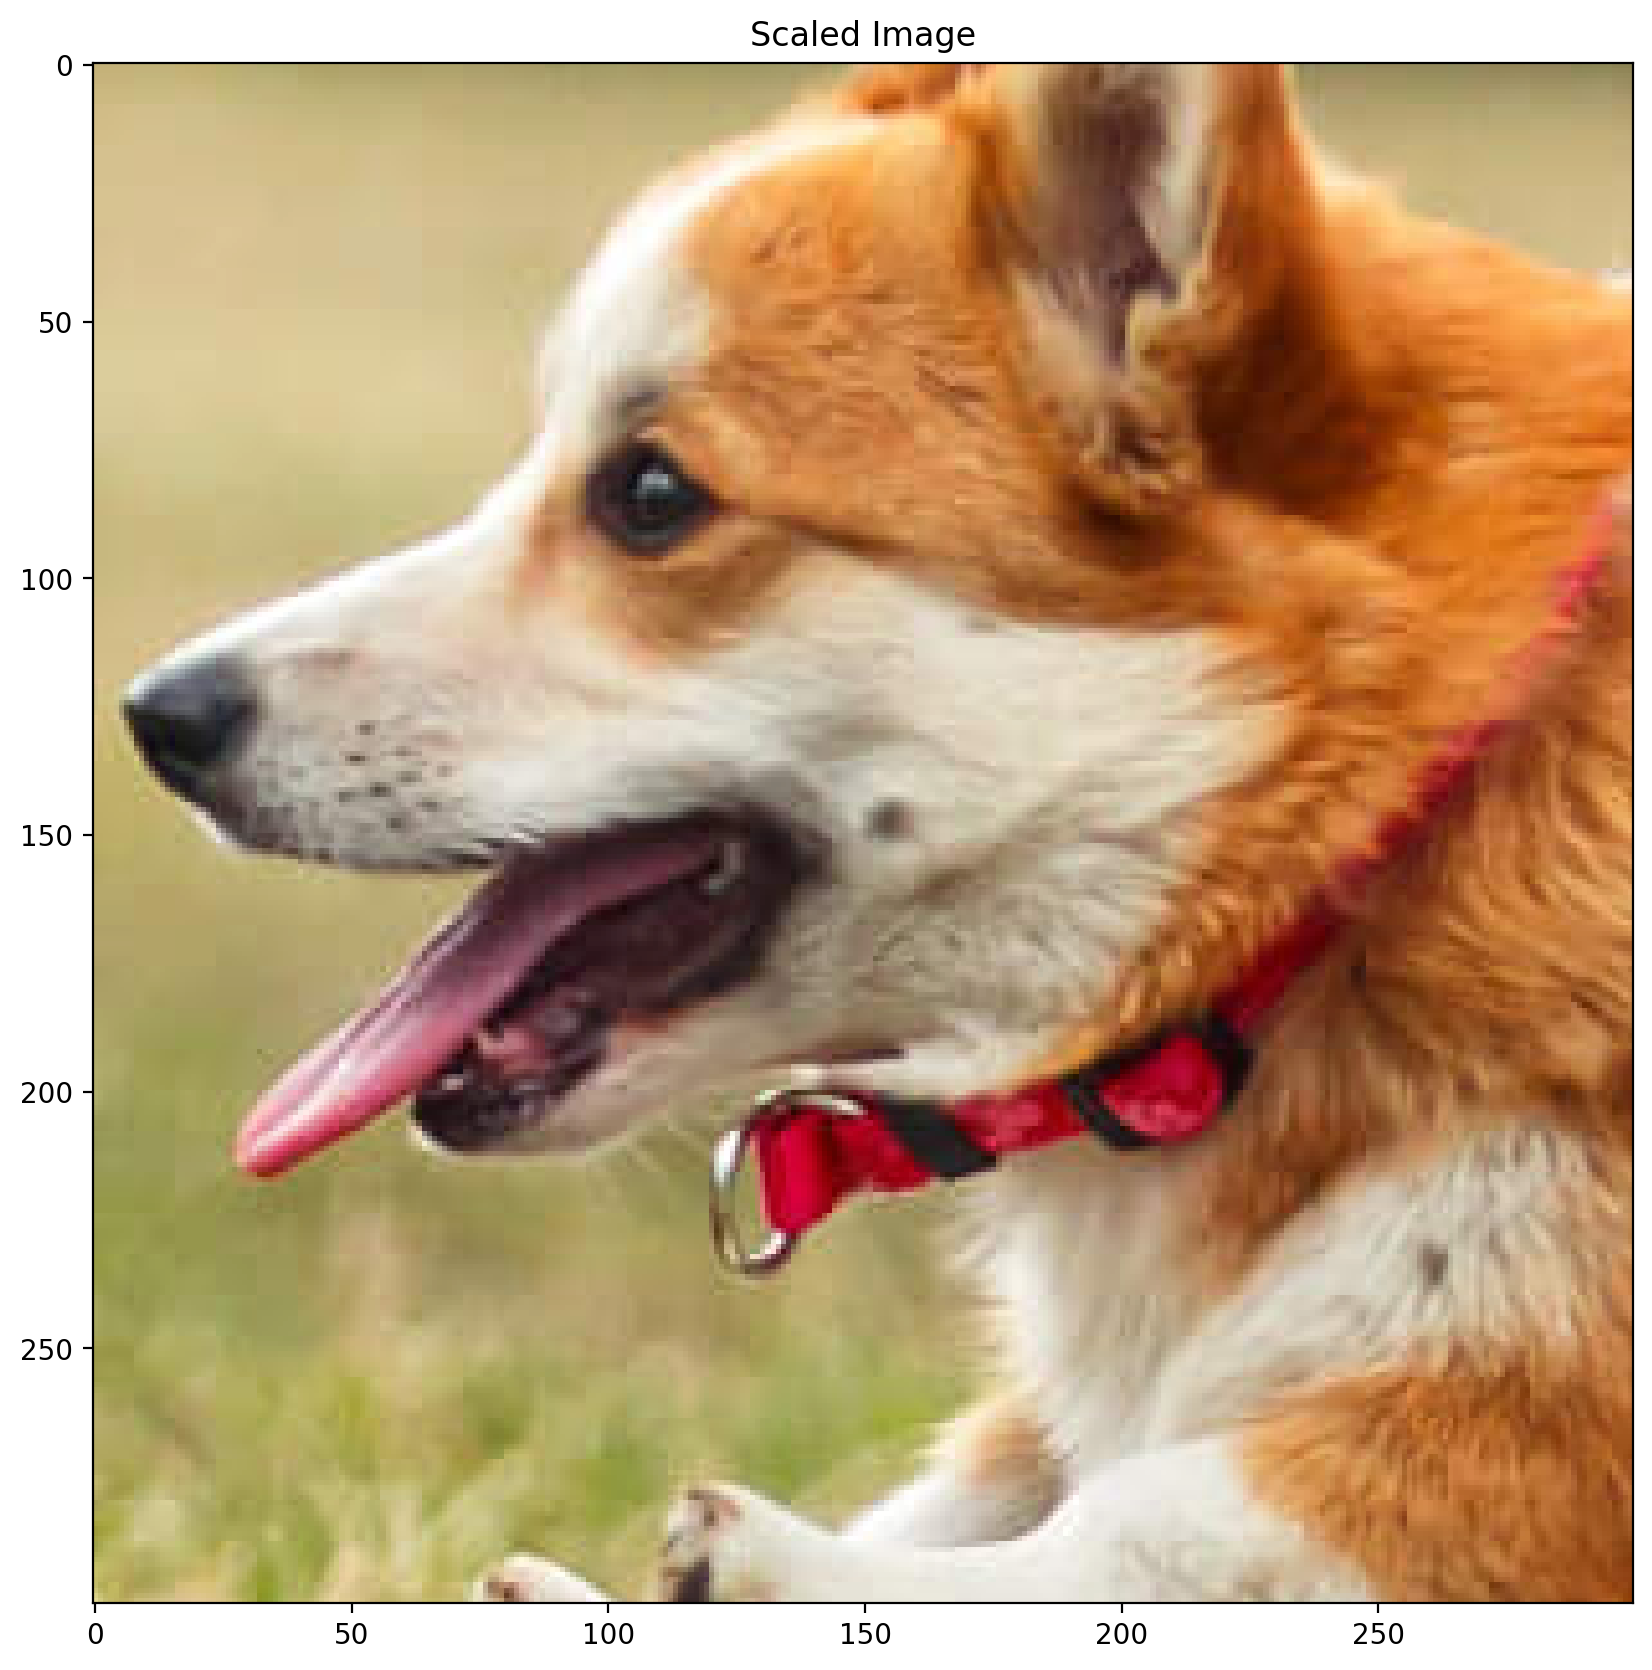

In [84]:
# Convert the tensor to a NumPy array and transpose dimensions for plotting using matplolib
img_np = crop.permute(1, 2, 0).numpy()
plt.figure(figsize=(10, 10))
plt.imshow(img_np)
plt.title('Scaled Image')
plt.show()

In [87]:
# Creating 3 patches
img_1 = crop[:,  150:200, 150:200]
img_2 = crop[:, 50:100, 50:100]
img_3 = crop[:, 200:250, 200:250]

Plotting the 3 images

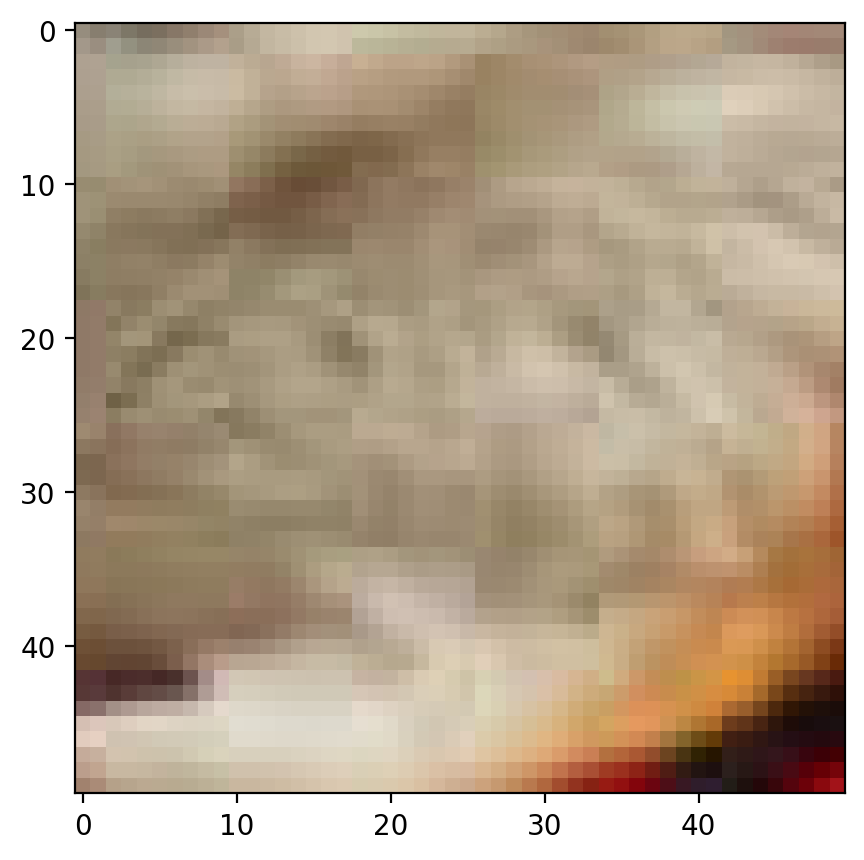

In [88]:
plot_img_1 = img_1.permute(1, 2, 0).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(plot_img_1)

plt.show()

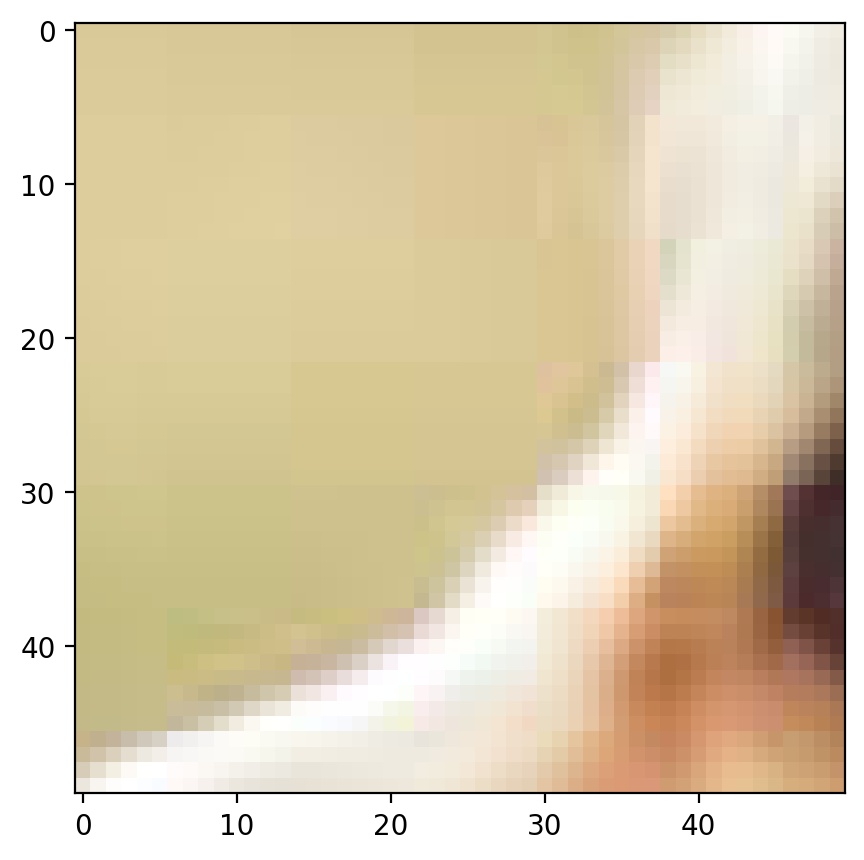

In [89]:
plot_img_2 = img_2.permute(1, 2, 0).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(plot_img_2)
plt.show()

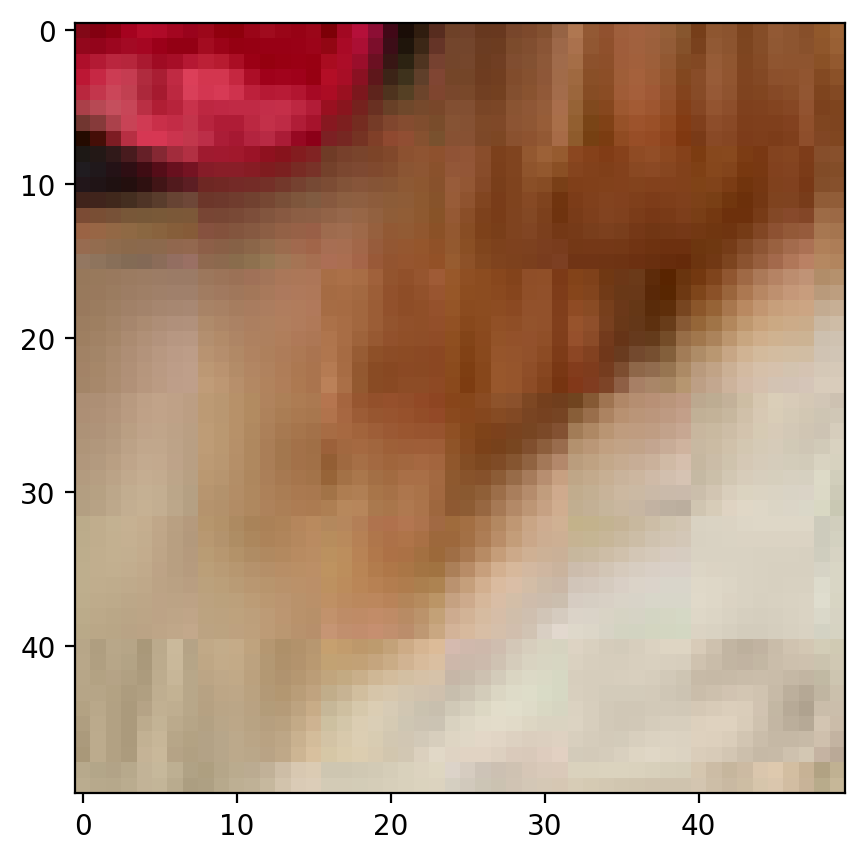

In [90]:
plot_img_3 = img_3.permute(1, 2, 0).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(plot_img_3)
plt.show()

In [91]:
img_1.shape

torch.Size([3, 50, 50])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07008612..0.9466846].


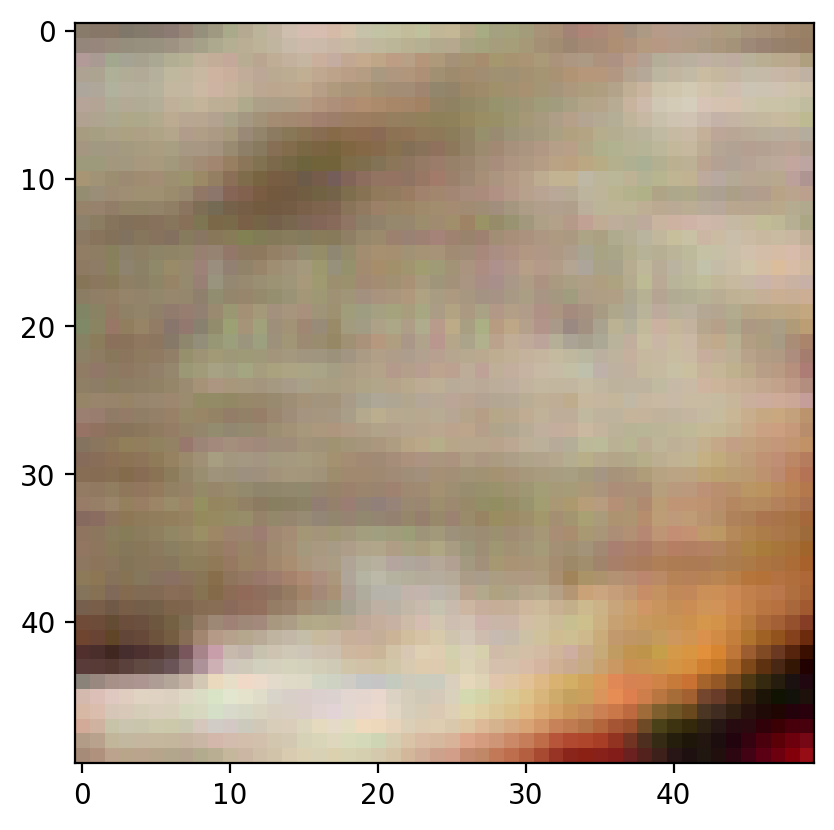

In [92]:
import torch.optim as optim

def factorize(A_colors, k, device=torch.device("cpu")):
    W_colors = []
    H_colors = []
    loss_vals = []

    # The loop will run three times for RGB
    # Each time the W, H matrix will be calculated and also the loss.
    for A in A_colors:
        A = A.to(device)

        W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
        H = torch.randn(k, A.shape[1], requires_grad=True, device=device)

        optimizer = optim.Adam([W, H], lr=0.01)
        # mask = ~torch.isnan(A)  # Removed mask computation

        for _ in range(1000):
            # Compute the difference matrix without masking
            diff_matrix = torch.mm(W, H) - A
            loss = torch.norm(diff_matrix)  # Compute the Frobenius norm

            # Zero the gradients
            optimizer.zero_grad() 

            # Backpropagate
            loss.backward() 

            # Update the parameters
            optimizer.step() 

        W_colors.append(W.detach().clone())
        H_colors.append(H.detach().clone())
        loss_vals.append(loss.detach().clone())

    return torch.stack(W_colors), torch.stack(H_colors), torch.stack(loss_vals)


W, H, loss = factorize(img_1, 10, device="cpu")

# Reconstruct the image from the factorized matrices
image_np = torch.matmul(W, H).cpu().numpy()

image_np = np.transpose(image_np, (1, 2, 0))  # Adjust axes if necessary

import matplotlib.pyplot as plt

plt.imshow(image_np)
plt.show()


In [93]:
loss

tensor([1.3527, 1.5369, 1.4599], dtype=torch.float64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07679844..0.94004226].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.03287691..0.918385].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.011926005..0.90906173].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.005247712..0.92410296].


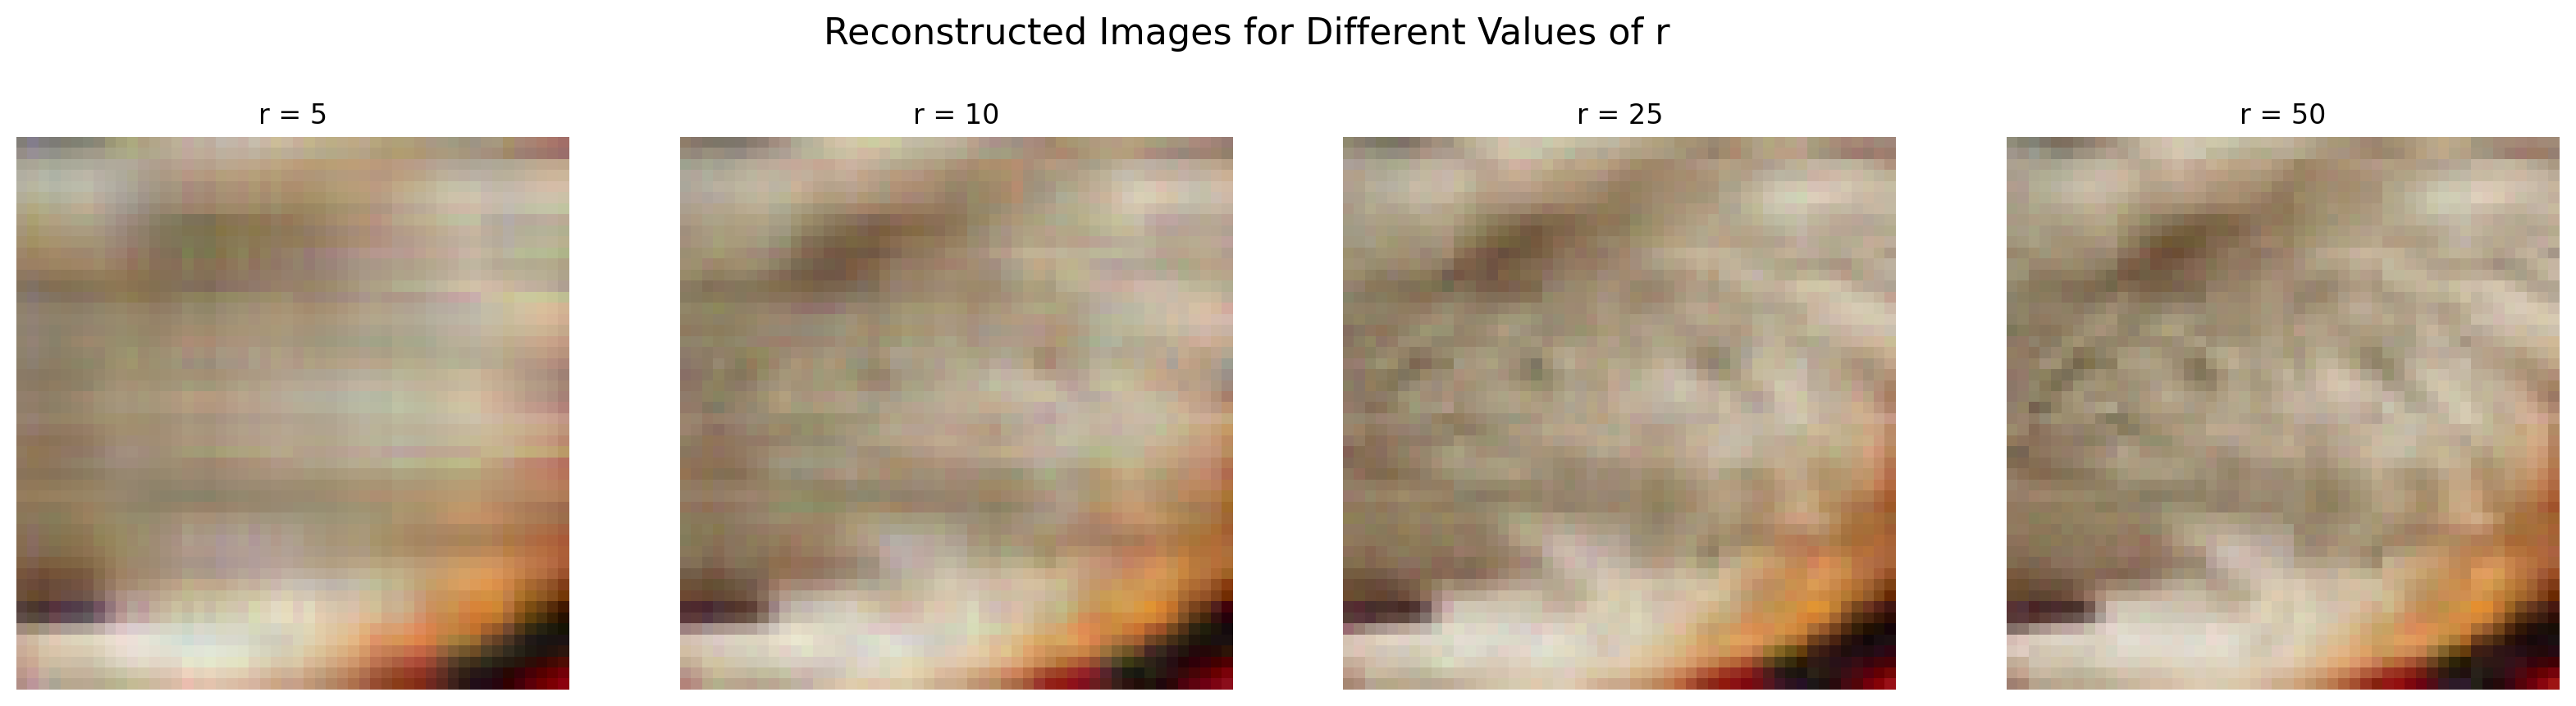

In [94]:
import matplotlib.pyplot as plt

# Perform factorization for different values of r
r_values = [5, 10, 25, 50]
reconstructed_images = []

for r in r_values:
    W, H, _ = factorize(img_1, r, device="cpu")  # Call factorize with the current r
    image_np = torch.matmul(W, H).cpu().numpy()  # Reconstruct the image
    image_np = np.transpose(image_np, (1, 2, 0))  # Adjust the axes
    reconstructed_images.append(image_np)  # Store the reconstructed image

# Create subplots to visualize the reconstructed images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Create 1 row and 4 columns of subplots

for i, ax in enumerate(axes):
    ax.imshow(reconstructed_images[i])  # Show the reconstructed image
    ax.set_title(f"r = {r_values[i]}")  # Set the title for each subplot
    ax.axis('off')  # Hide the axes for a cleaner look

plt.suptitle("Reconstructed Images for Different Values of r", fontsize=16)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04793669..0.8905083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.021606058..0.911005].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.01904517..0.90475076].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.017506996..0.89700824].


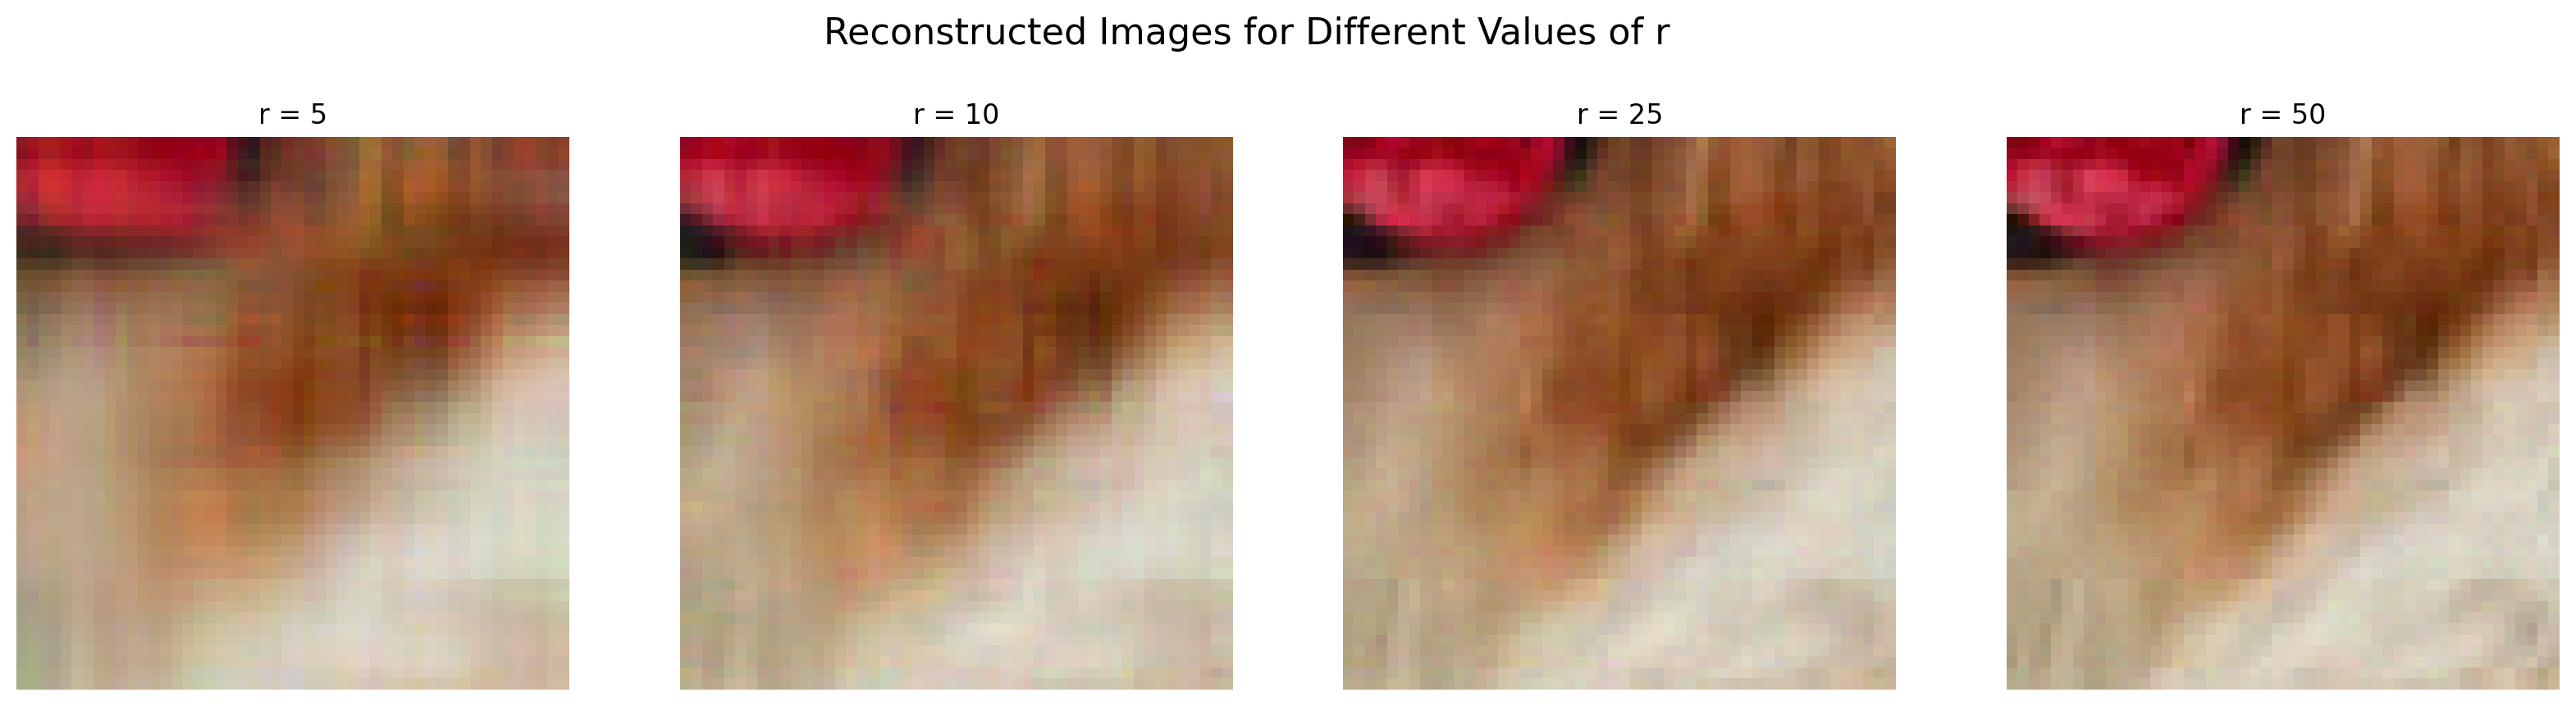

In [95]:
import matplotlib.pyplot as plt

# Perform factorization for different values of r
r_values = [5, 10, 25, 50]
reconstructed_images = []

for r in r_values:
    W, H, _ = factorize(img_3, r, device="cpu")  # Call factorize with the current r
    image_np = torch.matmul(W, H).cpu().numpy()  # Reconstruct the image
    image_np = np.transpose(image_np, (1, 2, 0))  # Adjust the axes
    reconstructed_images.append(image_np)  # Store the reconstructed image

# Create subplots to visualize the reconstructed images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Create 1 row and 4 columns of subplots

for i, ax in enumerate(axes):
    ax.imshow(reconstructed_images[i])  # Show the reconstructed image
    ax.set_title(f"r = {r_values[i]}")  # Set the title for each subplot
    ax.axis('off')  # Hide the axes for a cleaner look

plt.suptitle("Reconstructed Images for Different Values of r", fontsize=16)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.044066053..1.0097896].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.11268985..1.0284251].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.13131133..1.029991].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.13520348..1.0219524].


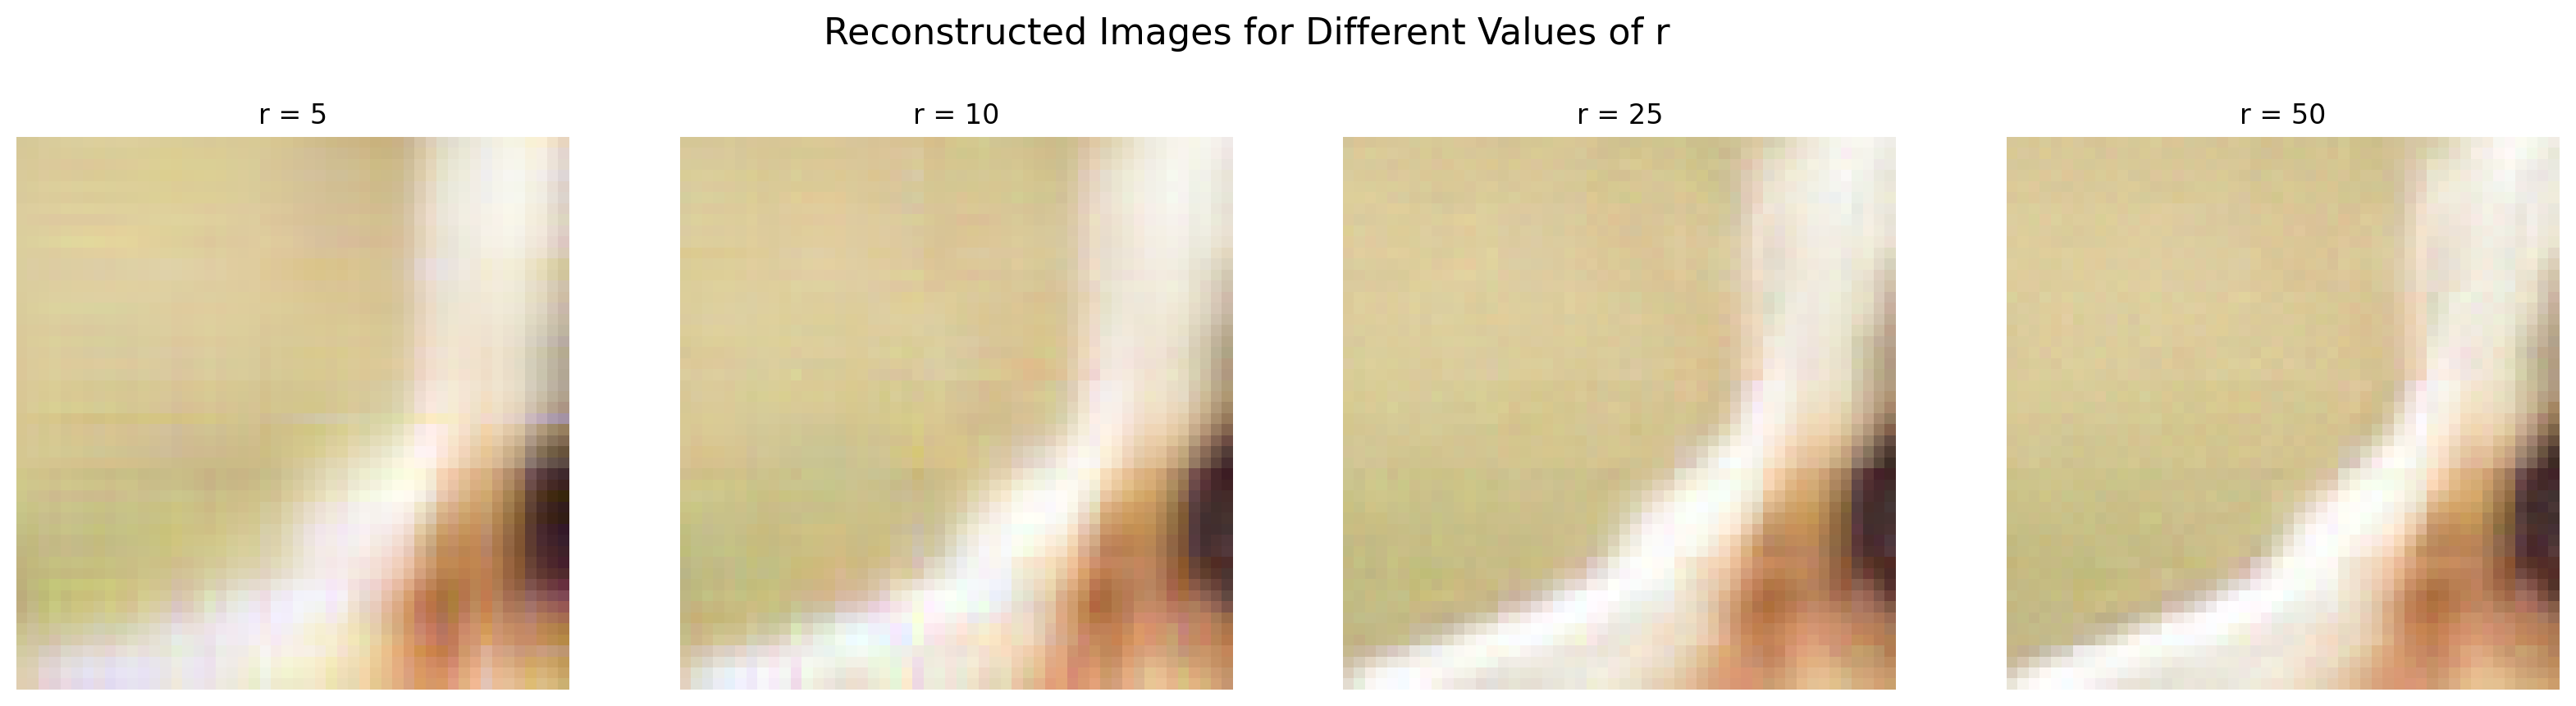

In [96]:
import matplotlib.pyplot as plt

# Perform factorization for different values of r
r_values = [5, 10, 25, 50]
reconstructed_images = []

for r in r_values:
    W, H, _ = factorize(img_2, r, device="cpu")  # Call factorize with the current r
    image_np = torch.matmul(W, H).cpu().numpy()  # Reconstruct the image
    image_np = np.transpose(image_np, (1, 2, 0))  # Adjust the axes
    reconstructed_images.append(image_np)  # Store the reconstructed image

# Create subplots to visualize the reconstructed images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Create 1 row and 4 columns of subplots

for i, ax in enumerate(axes):
    ax.imshow(reconstructed_images[i])  # Show the reconstructed image
    ax.set_title(f"r = {r_values[i]}")  # Set the title for each subplot
    ax.axis('off')  # Hide the axes for a cleaner look

plt.suptitle("Reconstructed Images for Different Values of r", fontsize=16)
plt.show()


In [97]:
def calculate_rmse(original, reconstructed):
    # Calculate the difference
    diff = original - reconstructed
    
    # Calculate RMSE
    rmse = torch.sqrt(torch.mean(diff ** 2))
    return rmse.item()

def calculate_psnr(original, reconstructed, max_pixel_value=1.0):
    rmse = calculate_rmse(original, reconstructed)
    
    # If RMSE is 0, PSNR is infinite --> perfect reconstruction
    if rmse == 0:
        return float('inf')
    
    psnr = 20 * torch.log10(torch.tensor(max_pixel_value)) - 20 * torch.log10(torch.tensor(rmse))
    return psnr.item()


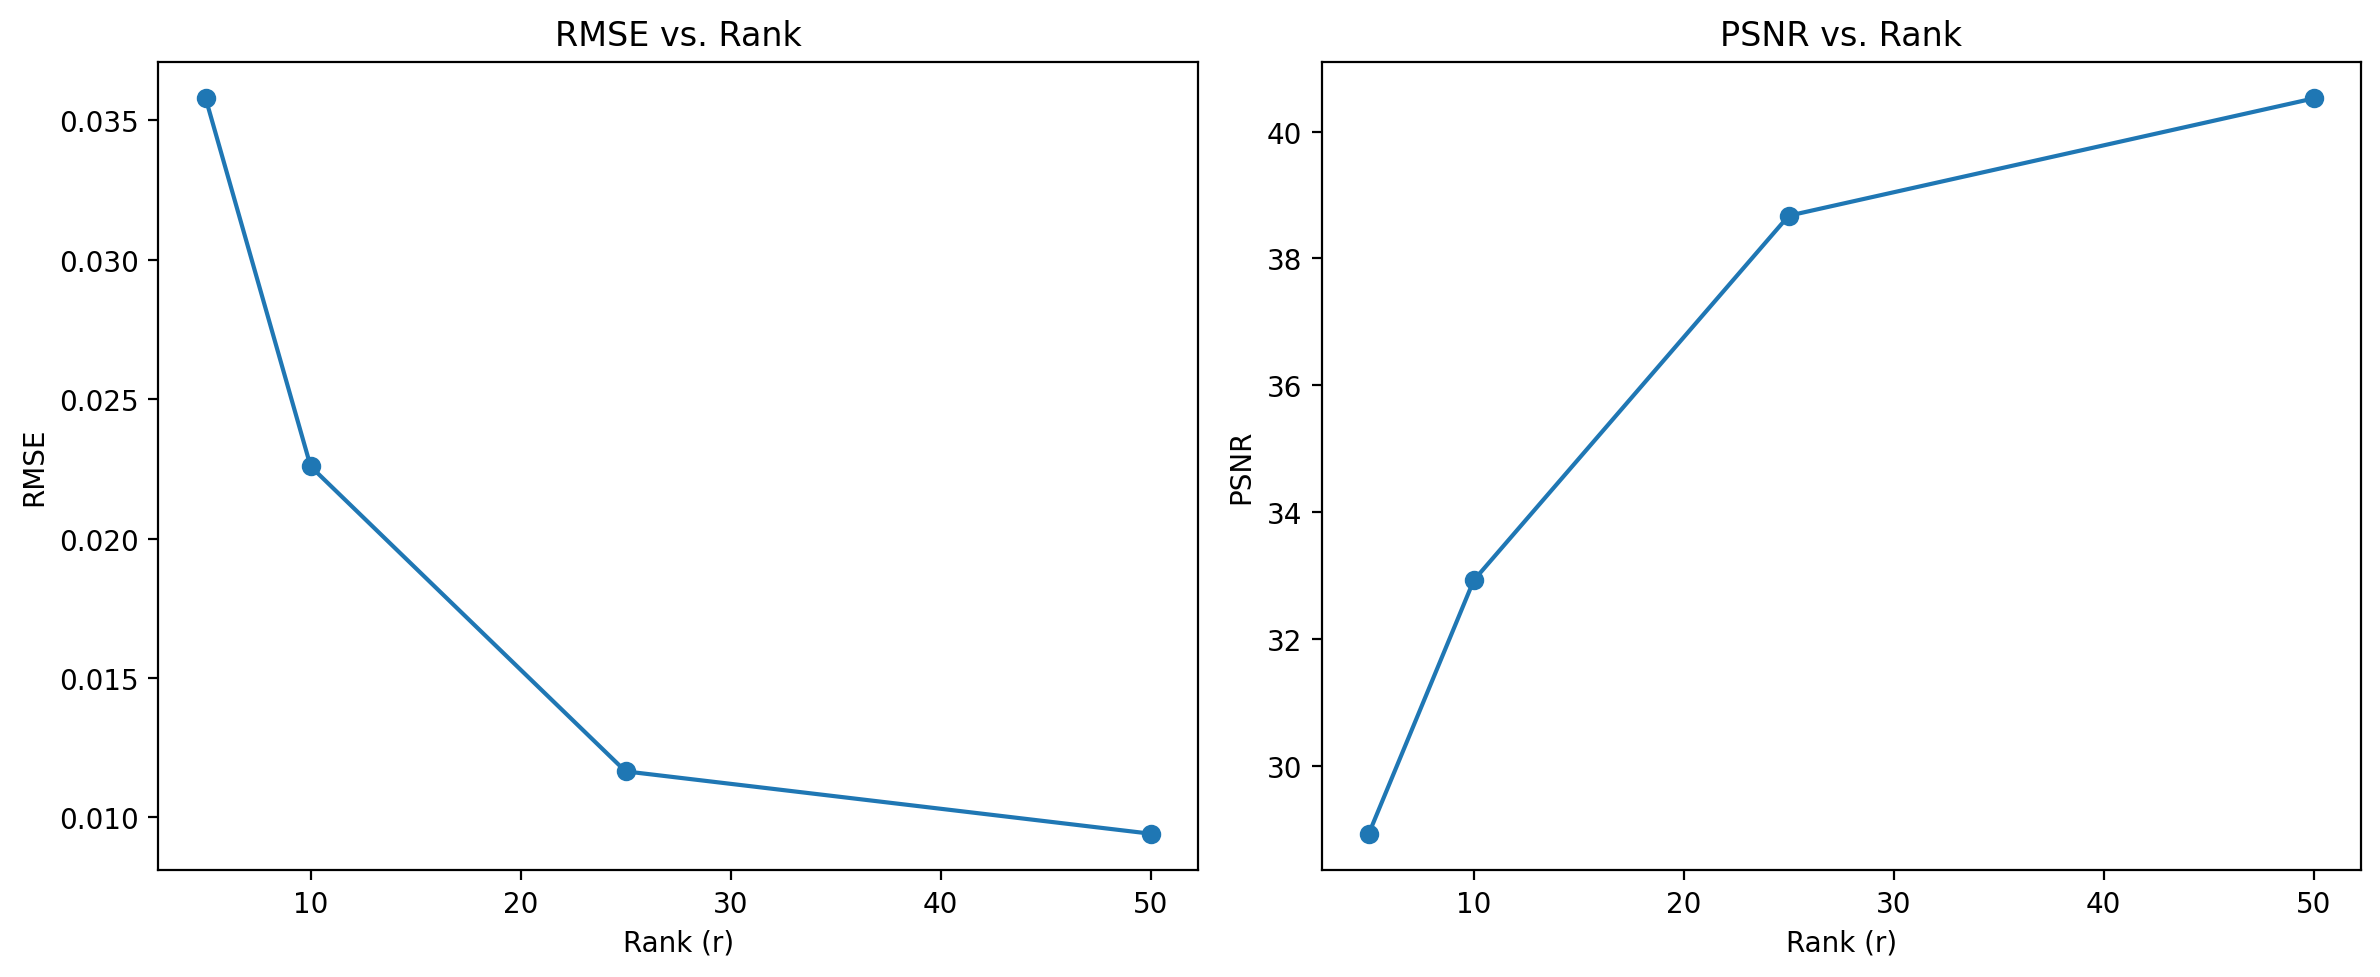

In [98]:
# For patch 2
r_values = [5,10,25,50] 
rmse_values = []
psnr_values = []

for r in r_values:
    W, H, _ = factorize(img_2, r, device="cpu")
    reconstructed_img = torch.matmul(W, H)
    rmse_value = calculate_rmse(img_2, reconstructed_img)
    psnr_value = calculate_psnr(img_2, reconstructed_img)
    
    rmse_values.append(rmse_value)
    psnr_values.append(psnr_value)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(r_values, rmse_values, marker='o')
plt.title('RMSE vs. Rank')
plt.xlabel('Rank (r)')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(r_values, psnr_values, marker='o')
plt.title('PSNR vs. Rank')
plt.xlabel('Rank (r)')
plt.ylabel('PSNR')

plt.tight_layout()
plt.show()

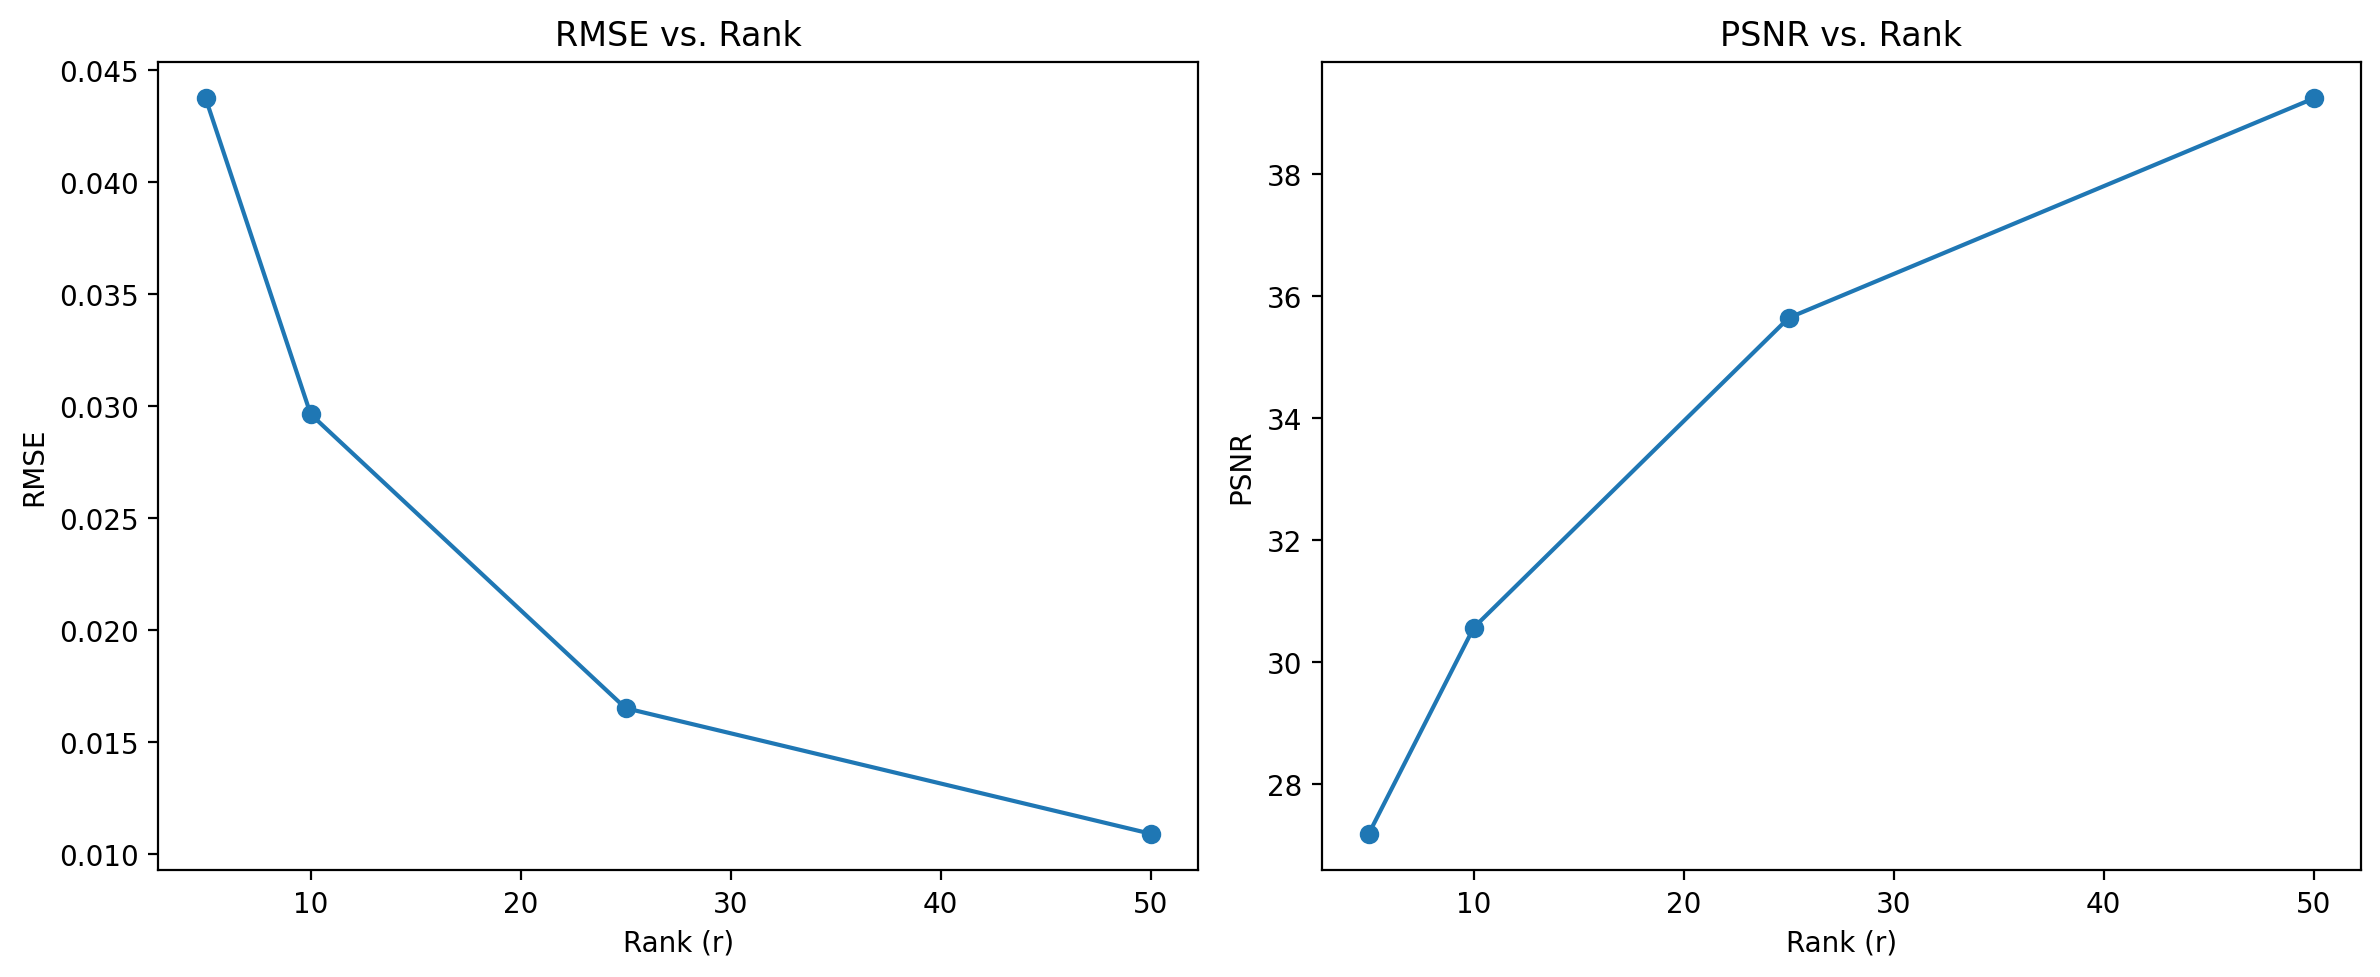

In [100]:
# For patch 1
r_values = [5,10,25,50] 
rmse_values = []
psnr_values = []

for r in r_values:
    W, H, _ = factorize(img_1, r, device="cpu")
    reconstructed_img = torch.matmul(W, H)
    rmse_value = calculate_rmse(img_1, reconstructed_img)
    psnr_value = calculate_psnr(img_1, reconstructed_img)
    
    rmse_values.append(rmse_value)
    psnr_values.append(psnr_value)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(r_values, rmse_values, marker='o')
plt.title('RMSE vs. Rank')
plt.xlabel('Rank (r)')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(r_values, psnr_values, marker='o')
plt.title('PSNR vs. Rank')
plt.xlabel('Rank (r)')
plt.ylabel('PSNR')

plt.tight_layout()
plt.show()

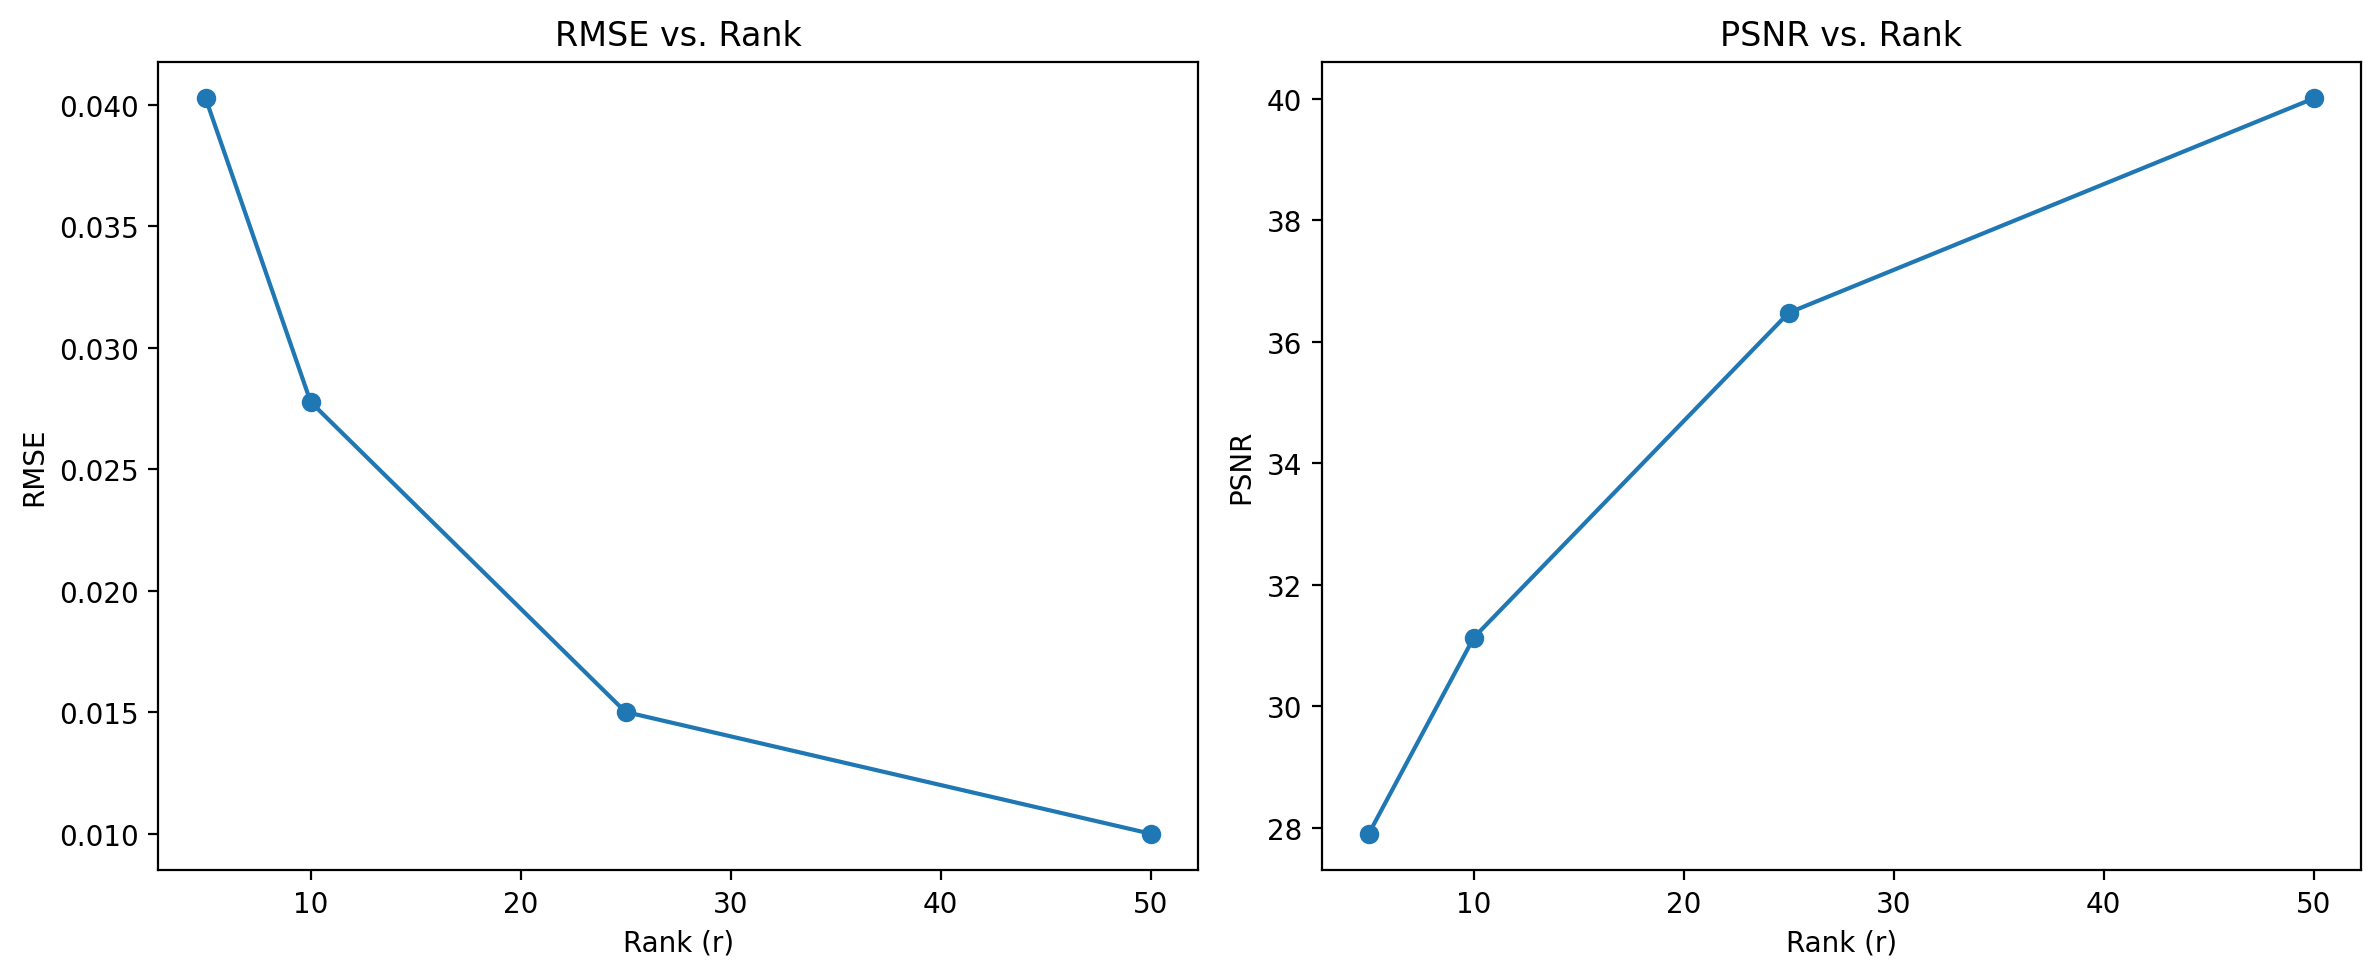

In [101]:
# For patch 3
r_values = [5,10,25,50] 
rmse_values = []
psnr_values = []

for r in r_values:
    W, H, _ = factorize(img_3, r, device="cpu")
    reconstructed_img = torch.matmul(W, H)
    rmse_value = calculate_rmse(img_3, reconstructed_img)
    psnr_value = calculate_psnr(img_3, reconstructed_img)
    
    rmse_values.append(rmse_value)
    psnr_values.append(psnr_value)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(r_values, rmse_values, marker='o')
plt.title('RMSE vs. Rank')
plt.xlabel('Rank (r)')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(r_values, psnr_values, marker='o')
plt.title('PSNR vs. Rank')
plt.xlabel('Rank (r)')
plt.ylabel('PSNR')

plt.tight_layout()
plt.show()

In [102]:
W, H, loss = factorize(img_2, 25, device="cpu")
image_np = torch.matmul(W, H).cpu().numpy()

In [103]:
crop_new = crop.clone()

In [104]:
crop_new[:, 50:100, 50:100] = torch.tensor(image_np, dtype=crop.dtype)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.021039605140686].


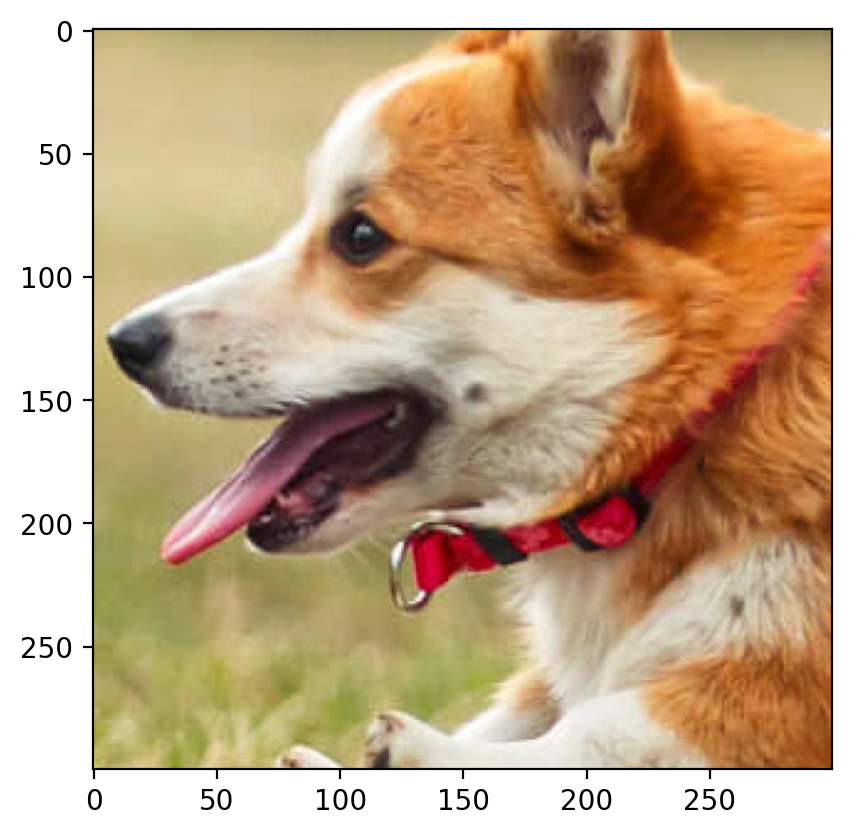

In [105]:
img_np = crop_new.permute(1, 2, 0).numpy()
plt.imshow(img_np)

In [106]:
# Mask the image with NaN values

def mask_image_rgb(img, prop):
    img_copy = img.clone()
    mask = torch.rand(img[0].shape) < prop
    img_copy[0][mask] = float('nan')
    img_copy[1][mask] = float('nan')
    img_copy[2][mask] = float('nan')
    return img_copy, mask

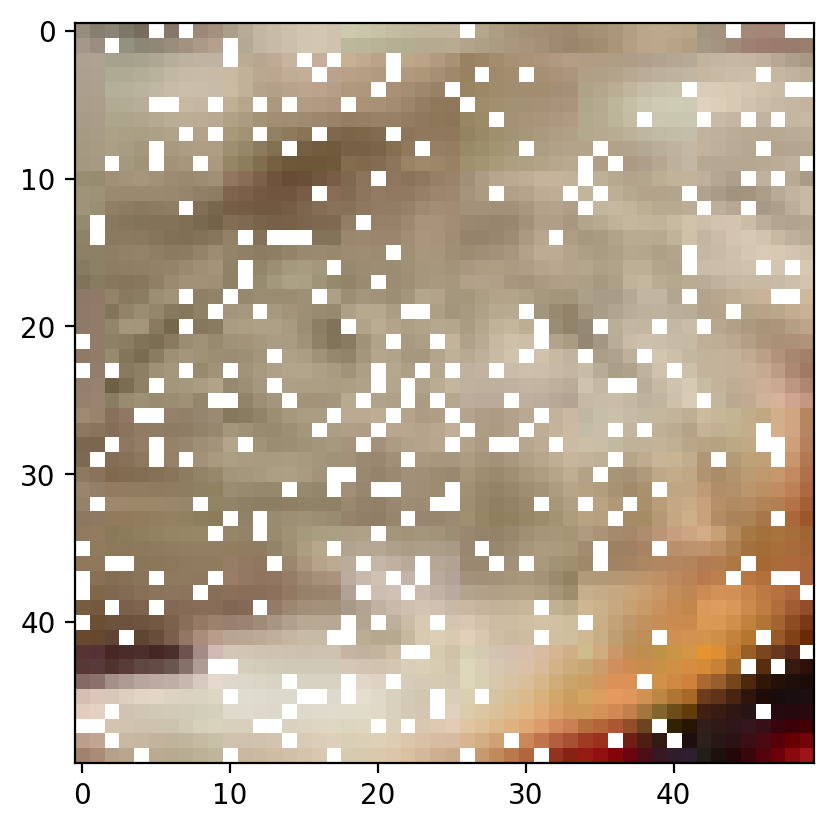

In [107]:
masked_img = mask_image_rgb(img_1, 0.1)
# 0.1 is basically masking 10% of the pixels.
img_np = masked_img[0].cpu().numpy()

# Rearrange the dimensions
img_np = np.transpose(img_np, (1, 2, 0))
# Torch stores images in the CHW format
# Matplotlib stores in HWC format, thus we have to convert it to 1,2,0 so that we can read the image from matplotlib

plt.imshow(img_np)
plt.show()

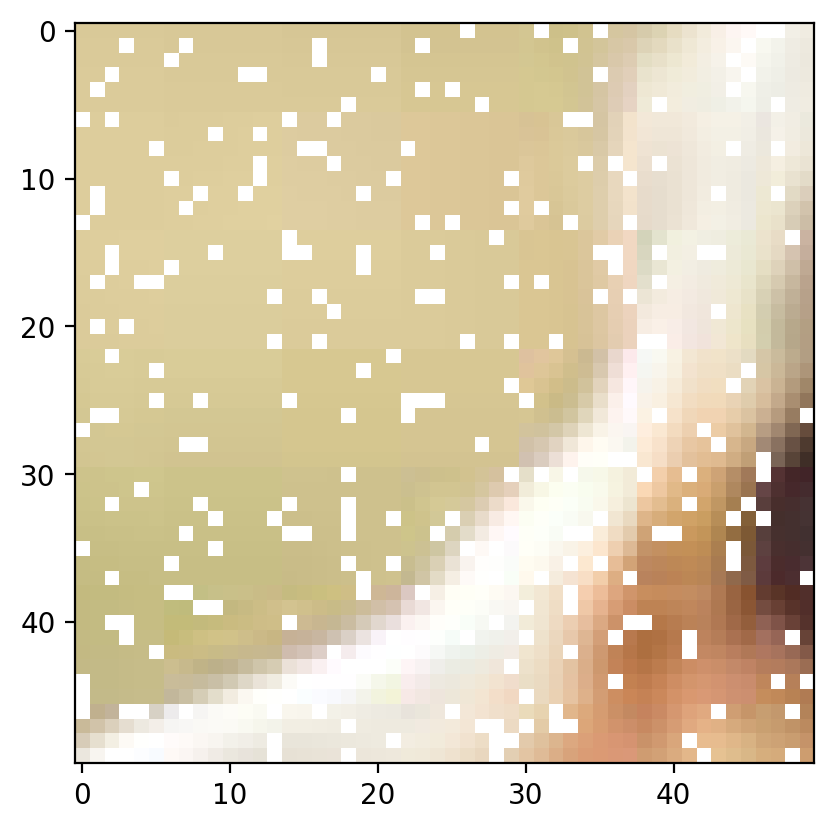

In [108]:
# For the 2nd patch
masked_img_2 = mask_image_rgb(img_2, 0.1)
img_np = masked_img_2[0].cpu().numpy()

# Rearrange the dimensions
img_np = np.transpose(img_np, (1, 2, 0))
# Torch stores images in the CHW format
# Matplotlib stores in HWC format, thus we have to convert it to 1,2,0 so that we can read the image from matplotlib

plt.imshow(img_np)
plt.show()

In [110]:
import torch.optim as optim
def factorize(A_colors, k, device=torch.device("cpu")):
    W_colors = []
    H_colors = []
    loss_vals = []

    # The loop will run three times for RGB
    # Each time the W, H matrix will be calulated and also the loss.
    for A in A_colors:
        A = A.to(device)

        W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
        H = torch.randn(k, A.shape[1], requires_grad=True, device=device)

        optimizer = optim.Adam([W, H], lr=0.01)
        mask = ~torch.isnan(A)

        for _ in range(1000):
            diff_matrix = torch.mm(W, H) - A # Compute the loss
            diff_vector = diff_matrix[mask]
            loss = torch.norm(diff_vector)

            # Zero the gradients
            optimizer.zero_grad() 

            # Backpropagate
            loss.backward() 

            # Update the parameters
            optimizer.step() 

        W_colors.append(W.detach().clone())
        H_colors.append(H.detach().clone())
        loss_vals.append(loss.detach().clone())

    return torch.stack(W_colors), torch.stack(H_colors), torch.stack(loss_vals)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.12363824..0.92383134].


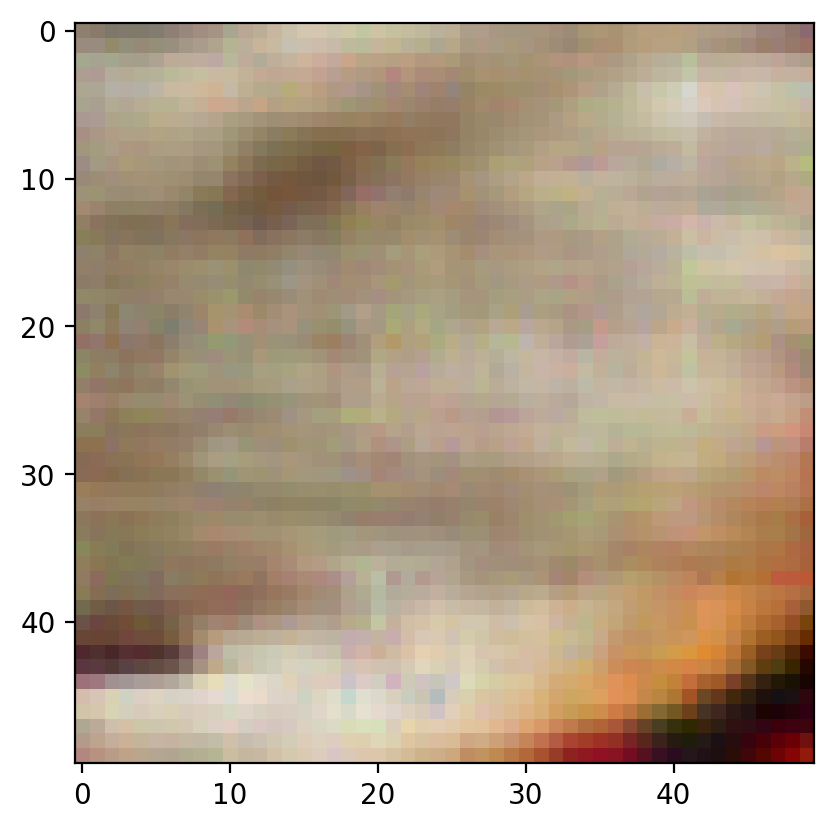

In [111]:
# For the first patch
W_1, H_1, loss_1 = factorize(masked_img[0], 10, device="cpu")
# Taking rank as 10

image_np_1 = torch.matmul(W_1, H_1).cpu().numpy()

image_np_1 = np.transpose(image_np_1, (1, 2, 0))

plt.imshow(image_np_1)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.13004124..1.0913663].


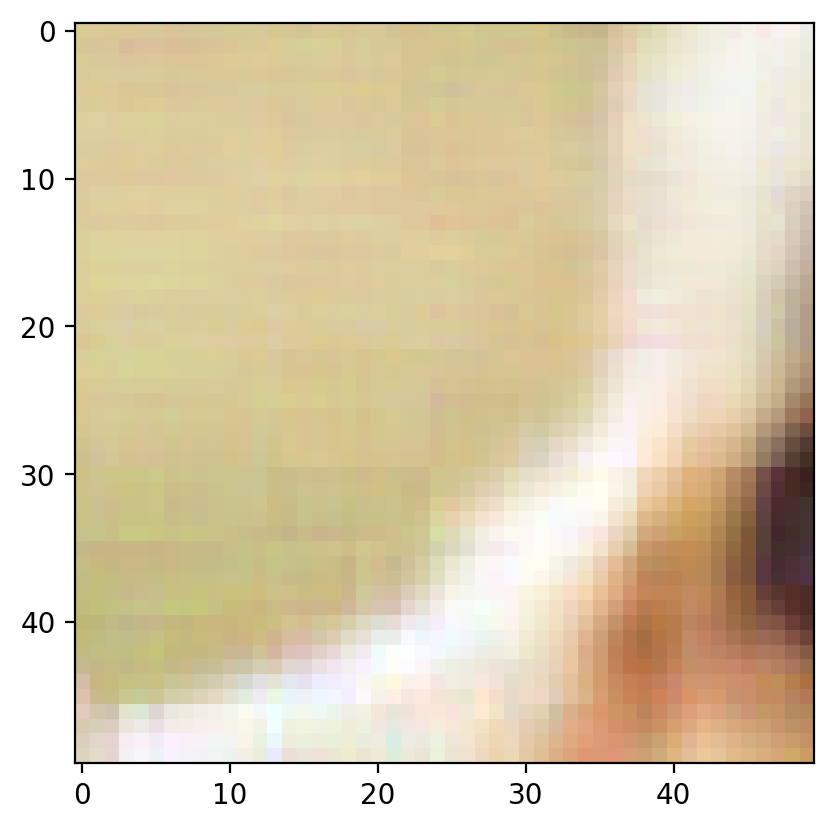

In [112]:
# For the 2nd patch
W_2, H_2, loss_2 = factorize(masked_img_2[0], 10, device="cpu")

image_np_2 = torch.matmul(W_2, H_2).cpu().numpy()

image_np_2 = np.transpose(image_np_2, (1, 2, 0))

plt.imshow(image_np_2)
plt.show()

In [114]:
W_1.shape, H_1.shape

(torch.Size([3, 50, 10]), torch.Size([3, 10, 50]))

In [115]:
def calculate_rmse(original, reconstructed):
    mask = ~torch.isnan(original)
    diff = original - reconstructed
    # Ignore NaN
    diff = diff[mask]

    rmse = torch.sqrt(torch.mean(diff ** 2))
    return rmse.item()

def calculate_psnr(original, reconstructed, max_pixel_value=1.0):
    rmse = calculate_rmse(original, reconstructed)
    
    # If RMSE is 0, PSNR is infinite --> perfect reconstruction
    if rmse == 0:
        return float('inf')
    
    psnr = 20 * torch.log10(torch.tensor(max_pixel_value)) - 20 * torch.log10(torch.tensor(rmse))
    return psnr.item()

In [116]:
# For the 1st patch 
original_img = masked_img[0]
reconstructed_img = torch.matmul(W_1, H_1) # It is A = W*H

rmse_value = calculate_rmse(original_img, reconstructed_img)
psnr_value = calculate_psnr(original_img, reconstructed_img)

print("For image1")
print(f"RMSE: {rmse_value}")
print(f"PSNR: {psnr_value}")

For image1
RMSE: 0.028389616576170368
PSNR: 30.936809539794922


In [117]:
# For the 2nd patch
original_img = masked_img_2[0]
reconstructed_img = torch.matmul(W_2, H_2) # It is A = W*H

rmse_value = calculate_rmse(original_img, reconstructed_img)
psnr_value = calculate_psnr(original_img, reconstructed_img)

print("For image2")
print(f"RMSE: {rmse_value}")
print(f"PSNR: {psnr_value}")

For image2
RMSE: 0.018680409402451914
PSNR: 34.57227325439453


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11278185..1.0023509].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19605112..0.98959345].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0145511925..0.98127025].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-9.439637..10.784092].


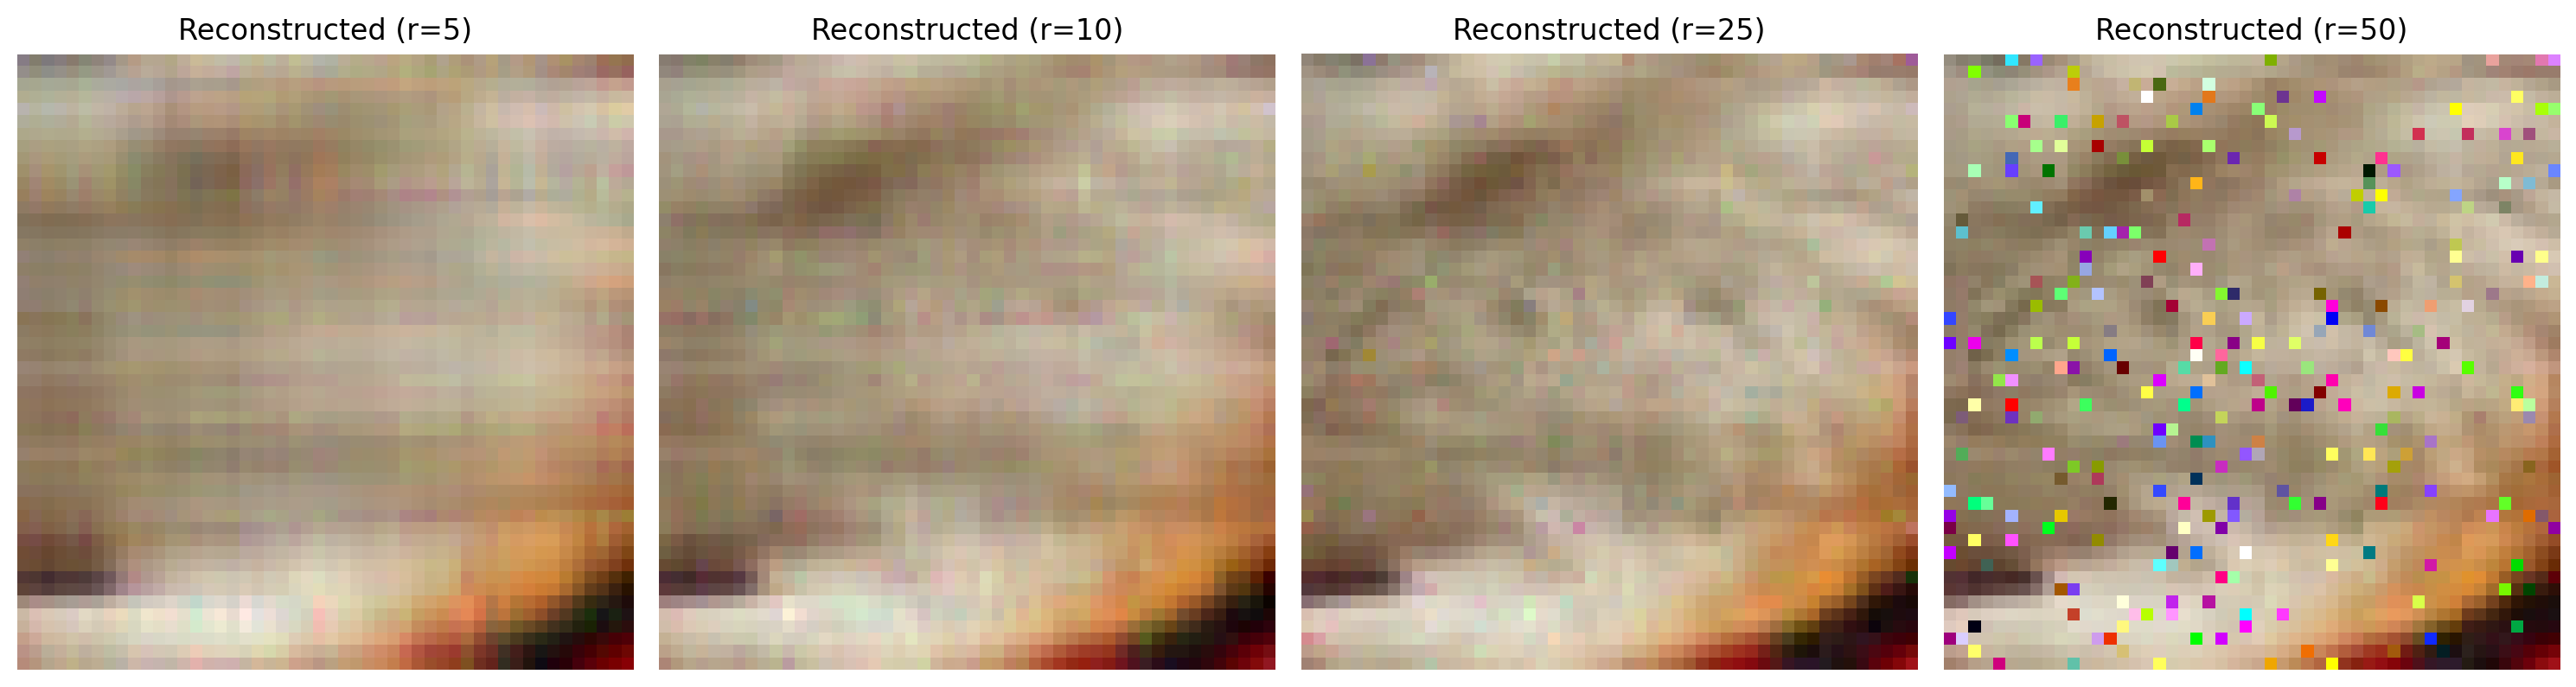

In [119]:
# Plotting for different values of r for patch 1
r_values = [5, 10, 25, 50]
fig, axs = plt.subplots(1, len(r_values), figsize=(15, 5))  # 1 row, len(r_values) columns for subplots

for idx, r in enumerate(r_values):
    # Perform matrix factorization for the current r value
    W, H, loss = factorize(masked_img[0], r, device="cpu")
    
    # Reconstruct the image
    image_np = torch.matmul(W, H).cpu().numpy()
    
    # Rearrange the dimensions to be in the correct format for plotting (H, W, C)
    image_np = np.transpose(image_np, (1, 2, 0))
    
    # Plot the reconstructed image in the corresponding subplot
    axs[idx].imshow(image_np)
    axs[idx].set_title(f"Reconstructed (r={r})")
    axs[idx].axis('off')  # Hide the axis

# Adjust the layout so the images don't overlap
plt.tight_layout()
plt.show()

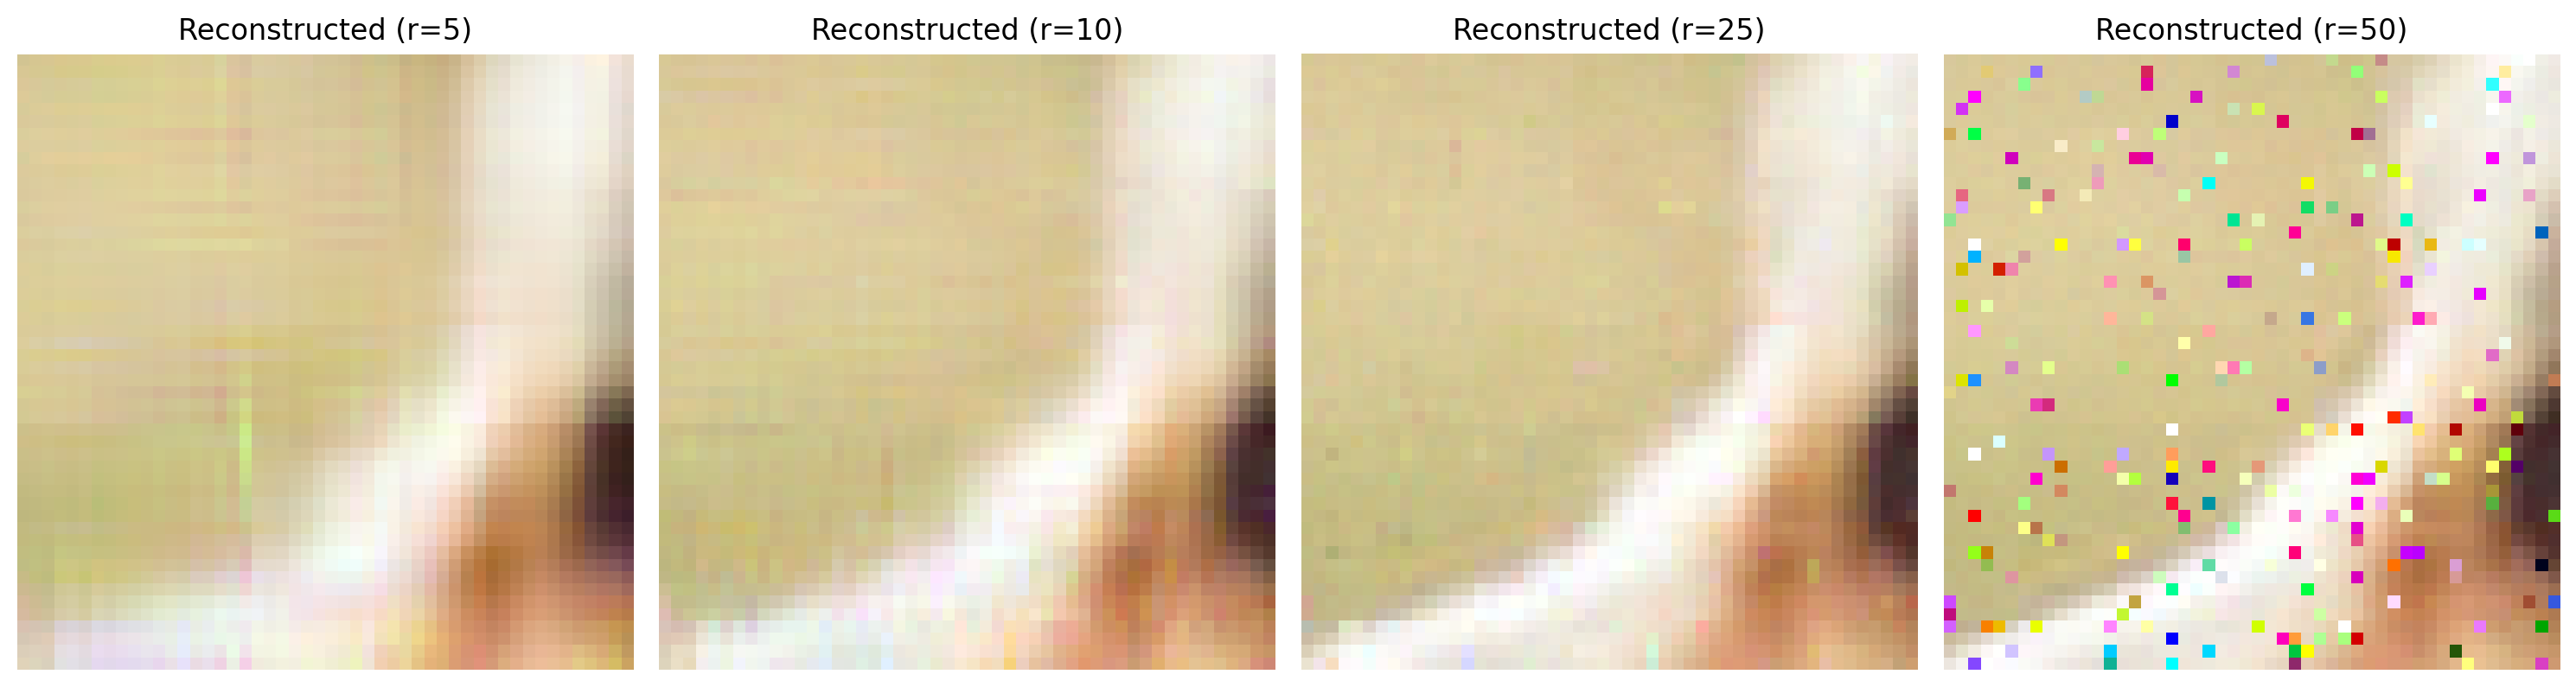

In [120]:
# Plotting for different values of r for patch 2
r_values = [5, 10, 25, 50]
fig, axs = plt.subplots(1, len(r_values), figsize=(15, 5))  # 1 row, len(r_values) columns for subplots

for idx, r in enumerate(r_values):
    # Perform matrix factorization for the current r value
    W, H, loss = factorize(masked_img_2[0], r, device="cpu")
    
    # Reconstruct the image
    image_np = torch.matmul(W, H).cpu().numpy()
    
    # Rearrange the dimensions to be in the correct format for plotting (H, W, C)
    image_np = np.transpose(image_np, (1, 2, 0))
    clipped_image = np.clip(image_np, 0, 1)
    
    # Plot the reconstructed image in the corresponding subplot
    axs[idx].imshow(clipped_image)
    axs[idx].set_title(f"Reconstructed (r={r})")
    axs[idx].axis('off')  # Hide the axis

# Adjust the layout so the images don't overlap
plt.tight_layout()
plt.show()

In [122]:
W, H, loss = factorize(masked_img_2[0], 10, device="cpu")
image_np = torch.matmul(W, H).cpu().numpy()

In [123]:
image_np.shape

(3, 50, 50)

In [124]:
crop_new = crop.clone()

In [125]:
crop_new[:, 50:100, 50:100] = torch.tensor(image_np, dtype=crop.dtype)

In [126]:
crop_new.shape

torch.Size([3, 300, 300])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0524296760559082].


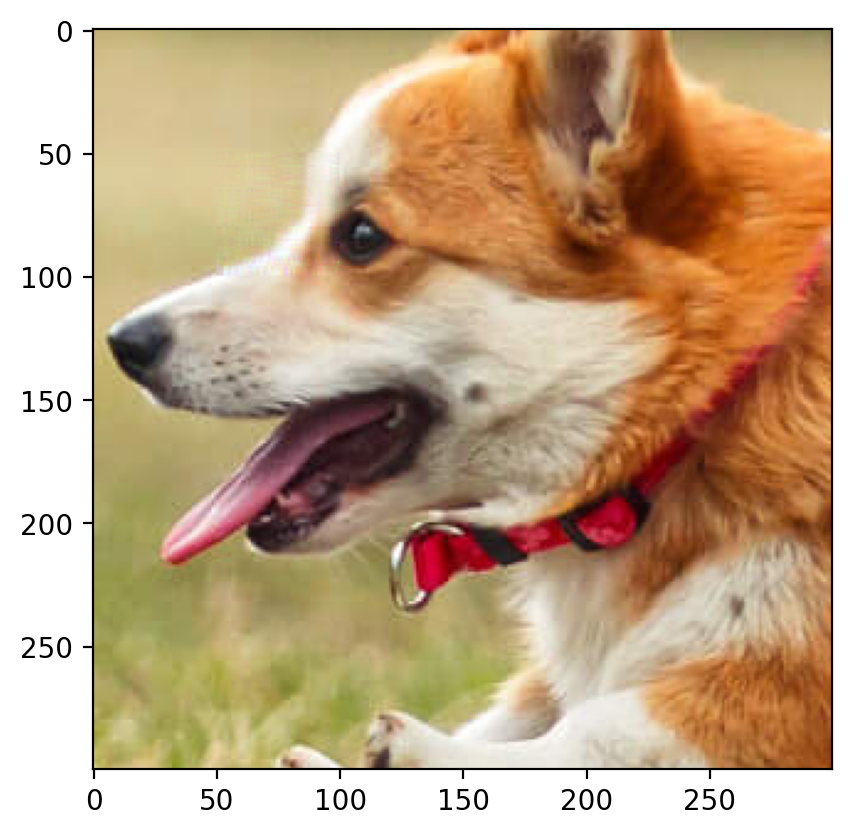

In [127]:
img_np = crop_new.permute(1, 2, 0).numpy()
plt.imshow(img_np)

Plotting RSME and PSNR for different values of r

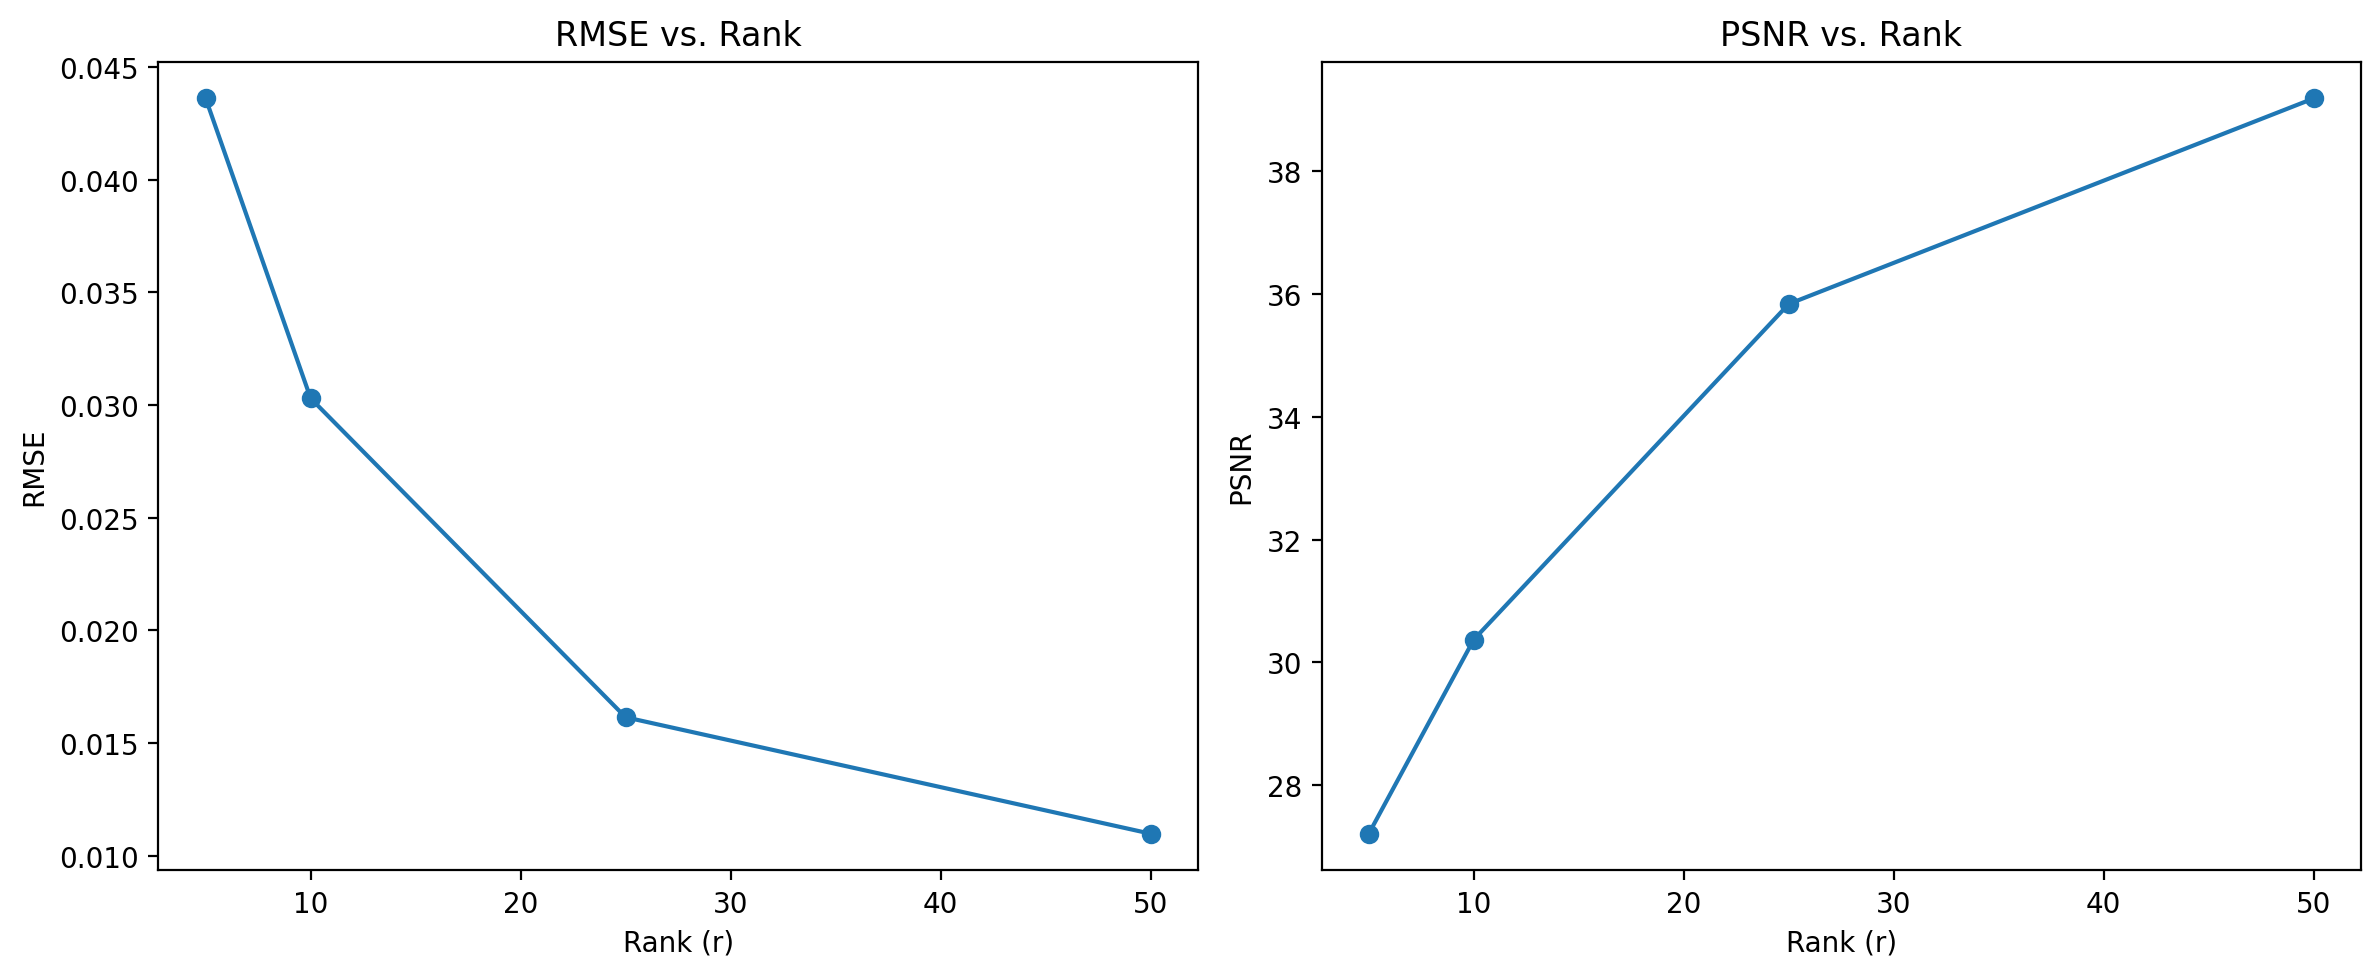

In [128]:
# For patch 1
r_values = [5,10,25,50] 
rmse_values = []
psnr_values = []

for r in r_values:
    W, H, _ = factorize(img_1, r, device="cpu")
    reconstructed_img = torch.matmul(W, H)
    rmse_value = calculate_rmse(img_1, reconstructed_img)
    psnr_value = calculate_psnr(img_1, reconstructed_img)
    
    rmse_values.append(rmse_value)
    psnr_values.append(psnr_value)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(r_values, rmse_values, marker='o')
plt.title('RMSE vs. Rank')
plt.xlabel('Rank (r)')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(r_values, psnr_values, marker='o')
plt.title('PSNR vs. Rank')
plt.xlabel('Rank (r)')
plt.ylabel('PSNR')

plt.tight_layout()
plt.show()

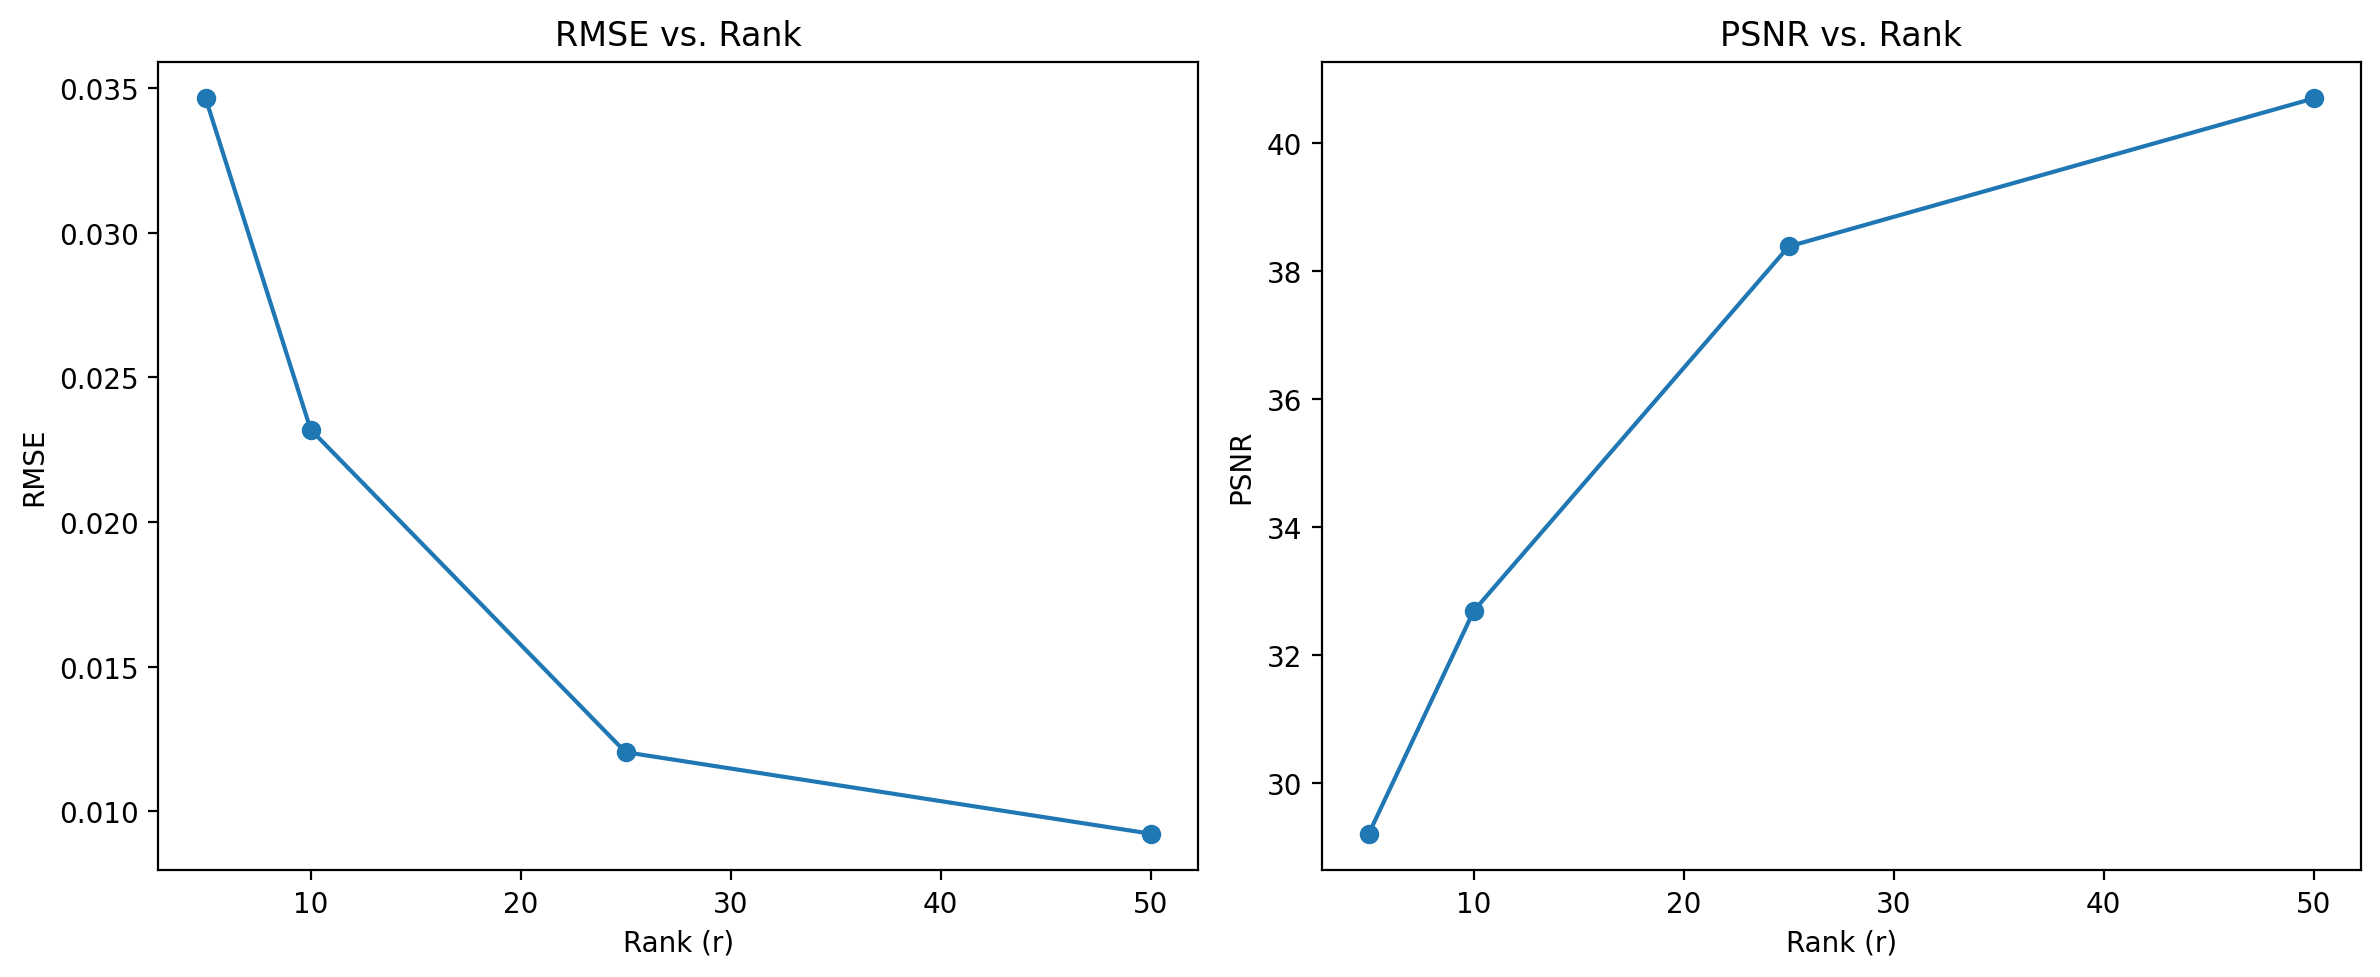

In [129]:
# For patch 2
r_values = [5,10,25,50] 
rmse_values = []
psnr_values = []

for r in r_values:
    W, H, _ = factorize(img_2, r, device="cpu")
    reconstructed_img = torch.matmul(W, H)
    rmse_value = calculate_rmse(img_2, reconstructed_img)
    psnr_value = calculate_psnr(img_2, reconstructed_img)
    
    rmse_values.append(rmse_value)
    psnr_values.append(psnr_value)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(r_values, rmse_values, marker='o')
plt.title('RMSE vs. Rank')
plt.xlabel('Rank (r)')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(r_values, psnr_values, marker='o')
plt.title('PSNR vs. Rank')
plt.xlabel('Rank (r)')
plt.ylabel('PSNR')

plt.tight_layout()
plt.show()